In [2]:
# read data
import pandas as pd

df = pd.read_excel('4.4.xlsx')
df.head()

Goal  Target Indicator   SeriesCode  \
0     4     4.4     4.4.1  SE_ADT_ACTS   
1     4     4.4     4.4.1  SE_ADT_ACTS   
2     4     4.4     4.4.1  SE_ADT_ACTS   
3     4     4.4     4.4.1  SE_ADT_ACTS   
4     4     4.4     4.4.1  SE_ADT_ACTS   

                                   SeriesDescription  GeoAreaCode GeoAreaName  \
0  Proportion of youth and adults with informatio...            8     Albania   
1  Proportion of youth and adults with informatio...            8     Albania   
2  Proportion of youth and adults with informatio...            8     Albania   
3  Proportion of youth and adults with informatio...            8     Albania   
4  Proportion of youth and adults with informatio...            8     Albania   

   TimePeriod  Value  Time_Detail  ...                            Source  \
0        2019   94.4         2019  ...  INSTAT (Institute of Statistics)   
1        2019   70.1         2019  ...  INSTAT (Institute of Statistics)   
2        2019   66.8         2019  ...  INSTAT (Institute of Statistics)   
3        2019   73.2         2019  ...  INSTAT (Institute of Statistics)   
4        2019   73.4         2019  ...  INSTAT (Institute of Statistics)   

   GeoInfoUrl  FootNote     Age Location  Nature Reporting Type      Sex  \
0         NaN       NaN   15-24  ALLAREA       C              G     MALE   
1         NaN       NaN   25-74  ALLAREA       C              G  BOTHSEX   
2         NaN       NaN   25-74  ALLAREA       C              G   FEMALE   
3         NaN       NaN   25-74  ALLAREA       C              G     MALE   
4         NaN       NaN  ALLAGE  ALLAREA       C              G   FEMALE   

  Type of skill    Units  
0         SNTWK  PERCENT  
1         SNTWK  PERCENT  
2         SNTWK  PERCENT  
3         SNTWK  PERCENT  
4         SNTWK  PERCENT  

[5 rows x 24 columns]

In [3]:
df.nunique()

Goal                    1
Target                  1
Indicator               1
SeriesCode              1
SeriesDescription       1
GeoAreaCode           113
GeoAreaName           113
TimePeriod             22
Value                1162
Time_Detail            22
TimeCoverage            0
UpperBound              0
LowerBound              0
BasePeriod              0
Source                249
GeoInfoUrl              0
FootNote              799
Age                     5
Location                3
Nature                  1
Reporting Type          1
Sex                     3
Type of skill          22
Units                   1
dtype: int64

In [6]:
# select column with nunique > 1
df = df.loc[:, df.nunique() > 1]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116774 entries, 0 to 116773
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   GeoAreaCode    116774 non-null  int64  
 1   GeoAreaName    116774 non-null  object 
 2   TimePeriod     116774 non-null  int64  
 3   Value          116774 non-null  float64
 4   Time_Detail    116774 non-null  int64  
 5   Source         116774 non-null  object 
 6   FootNote       33080 non-null   object 
 7   Age            116774 non-null  object 
 8   Location       116774 non-null  object 
 9   Sex            116774 non-null  object 
 10  Type of skill  116774 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 9.8+ MB


In [10]:
df.head()

GeoAreaCode GeoAreaName  TimePeriod  Value  Time_Detail  \
0            8     Albania        2019   94.4         2019   
1            8     Albania        2019   70.1         2019   
2            8     Albania        2019   66.8         2019   
3            8     Albania        2019   73.2         2019   
4            8     Albania        2019   73.4         2019   

                             Source FootNote     Age Location      Sex  \
0  INSTAT (Institute of Statistics)      NaN   15-24  ALLAREA     MALE   
1  INSTAT (Institute of Statistics)      NaN   25-74  ALLAREA  BOTHSEX   
2  INSTAT (Institute of Statistics)      NaN   25-74  ALLAREA   FEMALE   
3  INSTAT (Institute of Statistics)      NaN   25-74  ALLAREA     MALE   
4  INSTAT (Institute of Statistics)      NaN  ALLAGE  ALLAREA   FEMALE   

  Type of skill  
0         SNTWK  
1         SNTWK  
2         SNTWK  
3         SNTWK  
4         SNTWK

In [15]:
# select column yang diperlukan
df = df[["GeoAreaCode", "GeoAreaName", "TimePeriod", "Value", "Age", "Sex", "Type of skill"]]
df.head()

GeoAreaCode GeoAreaName  TimePeriod  Value     Age      Sex Type of skill
0            8     Albania        2019   94.4   15-24     MALE         SNTWK
1            8     Albania        2019   70.1   25-74  BOTHSEX         SNTWK
2            8     Albania        2019   66.8   25-74   FEMALE         SNTWK
3            8     Albania        2019   73.2   25-74     MALE         SNTWK
4            8     Albania        2019   73.4  ALLAGE   FEMALE         SNTWK

In [17]:
df_indonesia = df[df["GeoAreaName"] == "Indonesia"]
df_indonesia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 639 entries, 45449 to 46087
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GeoAreaCode    639 non-null    int64  
 1   GeoAreaName    639 non-null    object 
 2   TimePeriod     639 non-null    int64  
 3   Value          639 non-null    float64
 4   Age            639 non-null    object 
 5   Sex            639 non-null    object 
 6   Type of skill  639 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 39.9+ KB


In [19]:
df["Type of skill"].unique()

array(['SNTWK', 'HLTHINF', 'SOFT', 'EPRS', 'TRAF', 'PCPR', 'PRVCY',
       'UPLD', 'DLDONLD', 'VOIP', 'INTBNK', 'GSINF', 'COPA', 'FONLCRS',
       'ONLCNS', 'VRFY', 'GSPUR', 'ARSP', 'EMAIL', 'INST', 'ONLSFT',
       'SCRTY'], dtype=object)

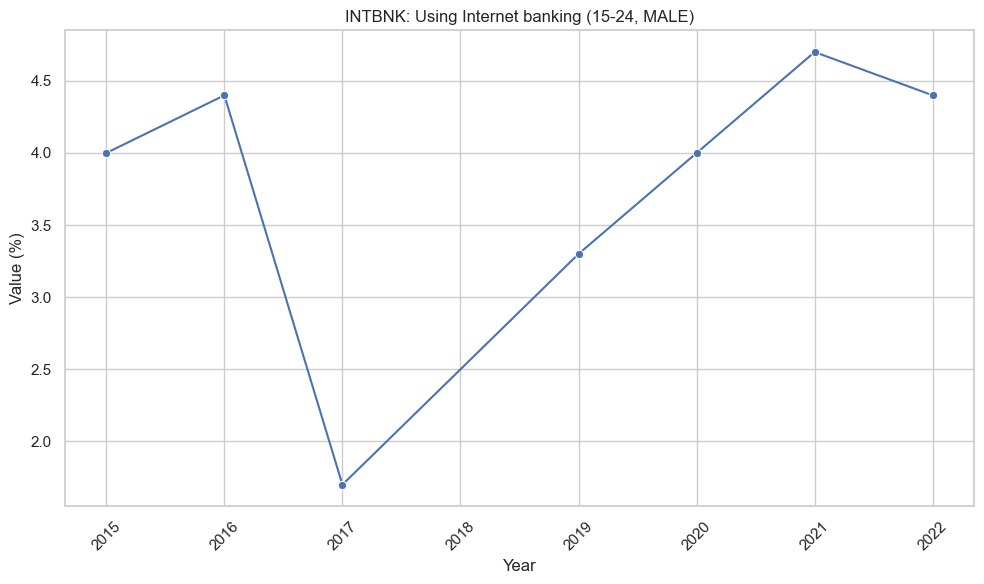

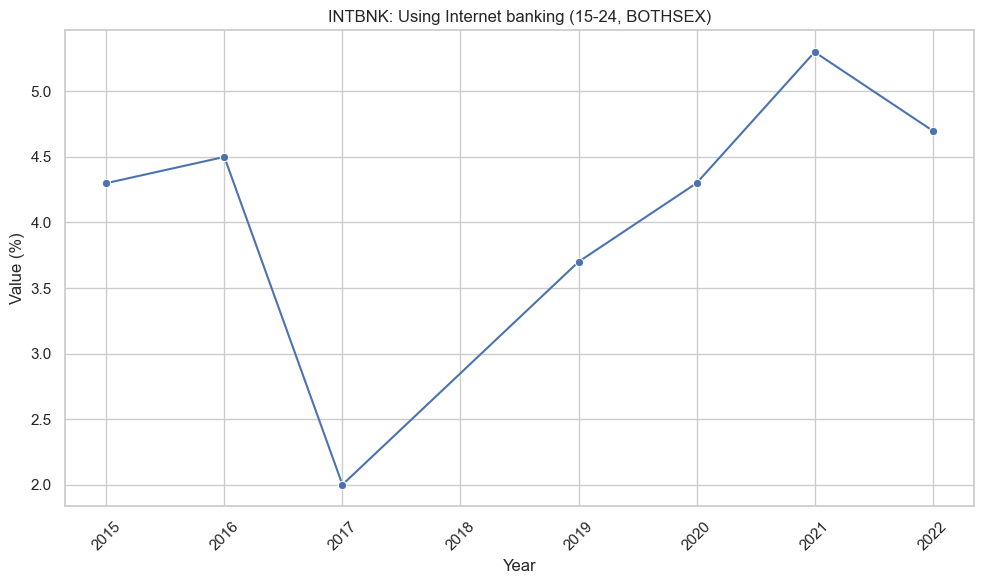

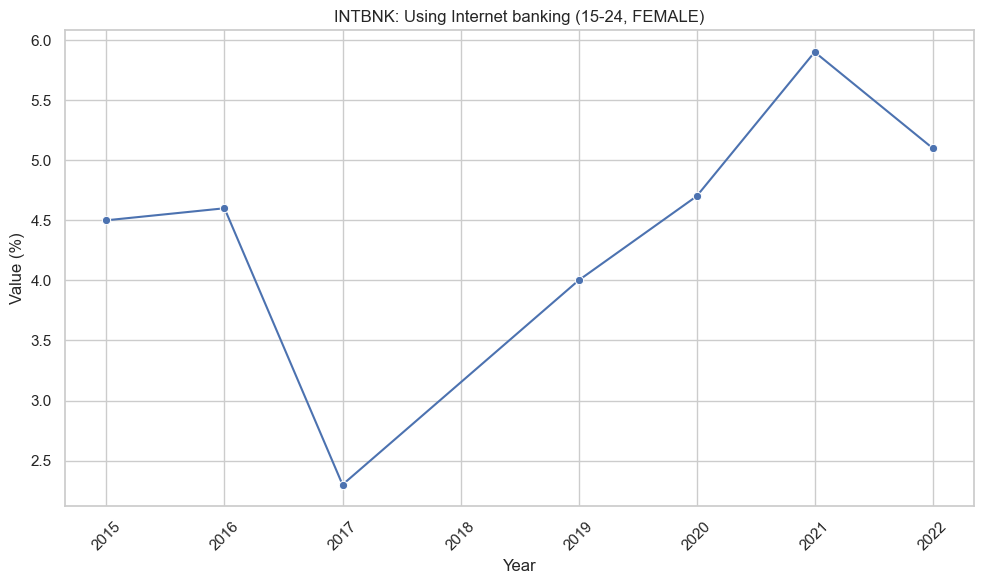

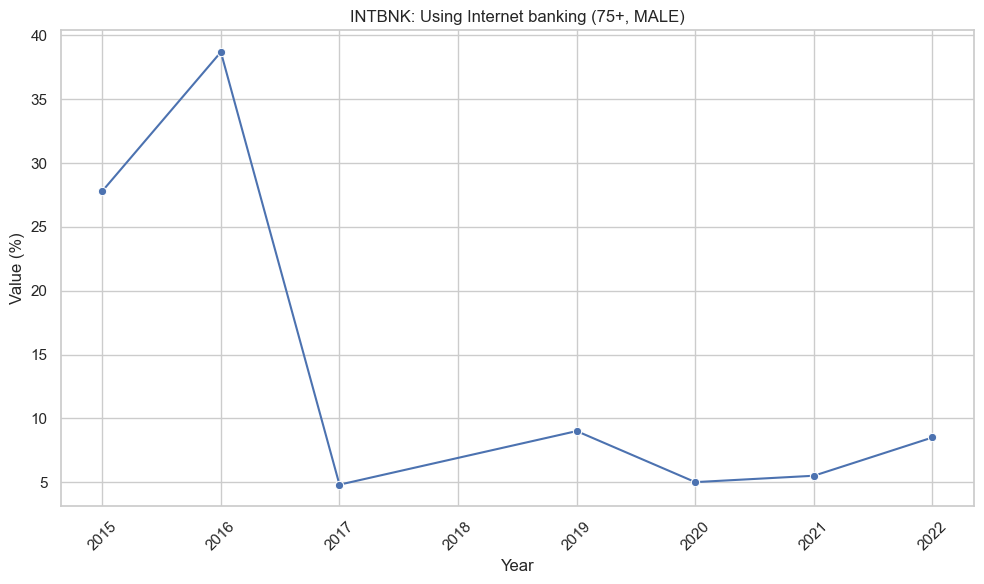

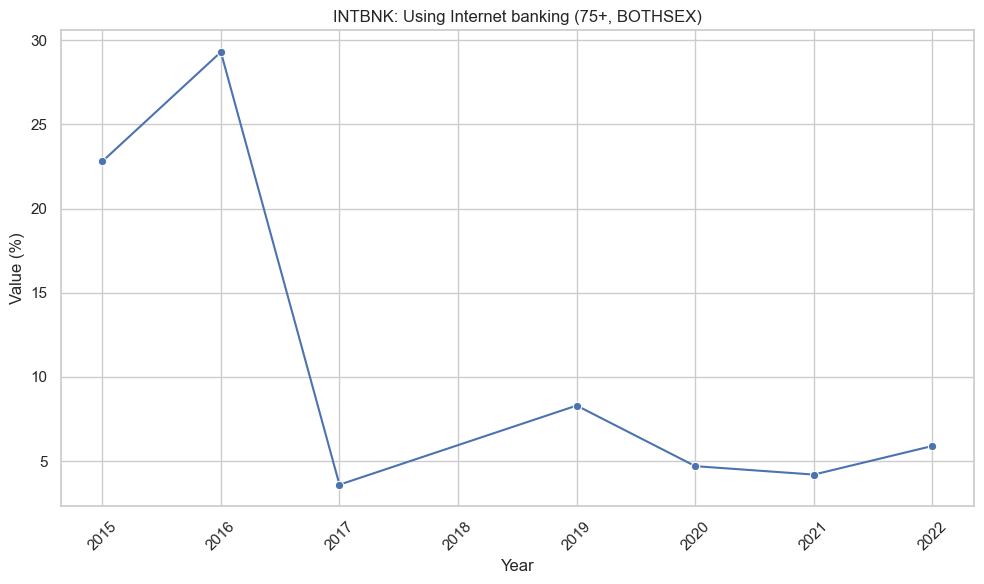

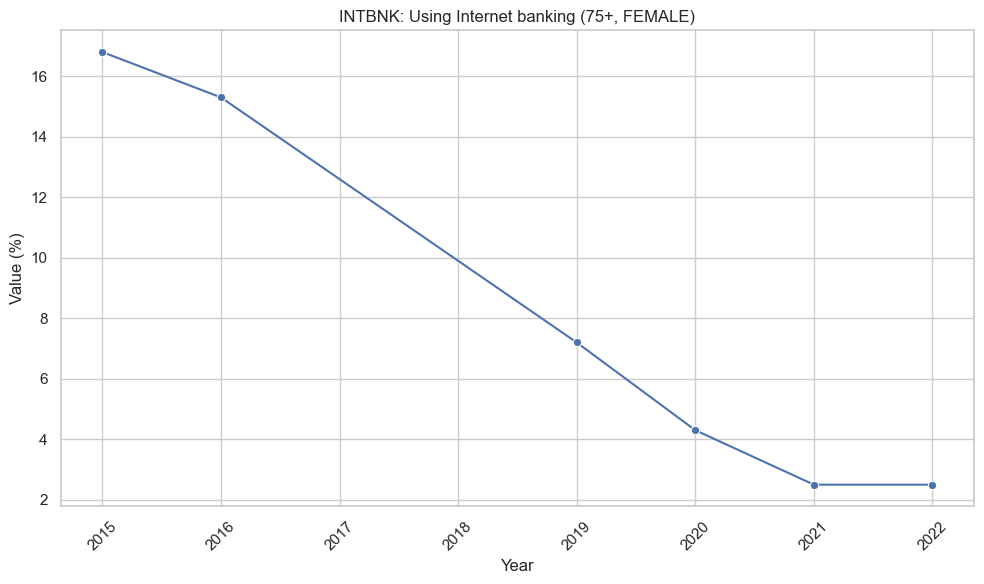

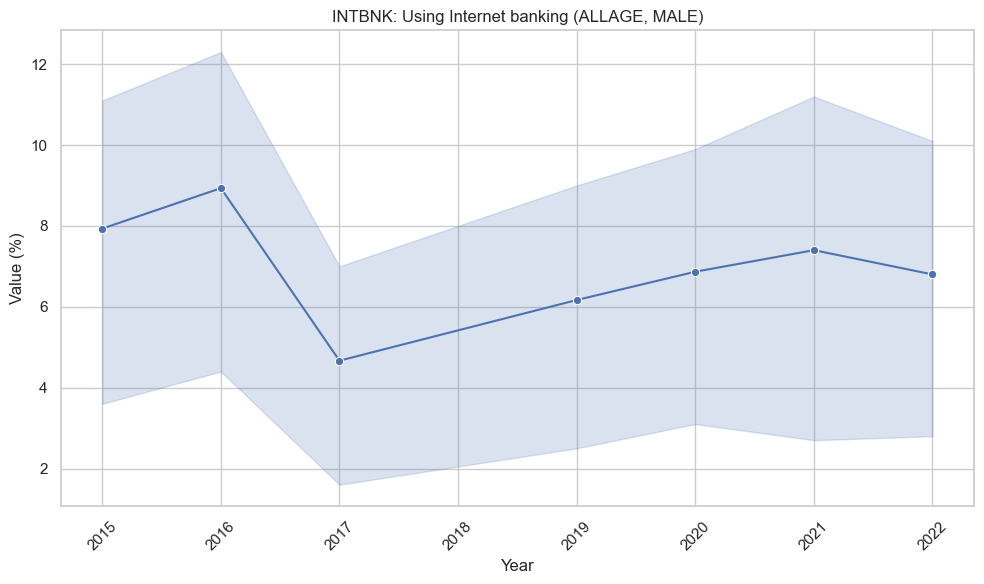

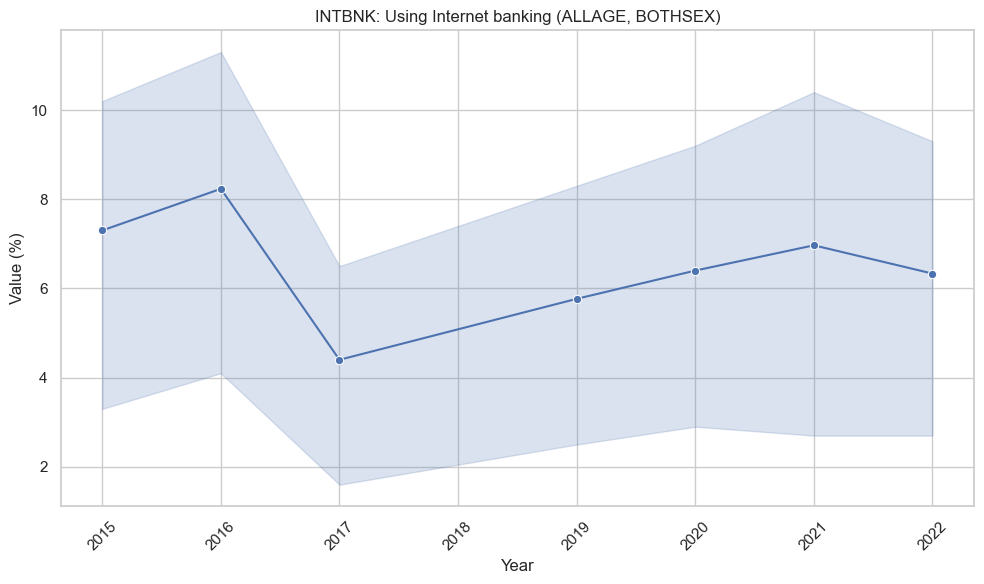

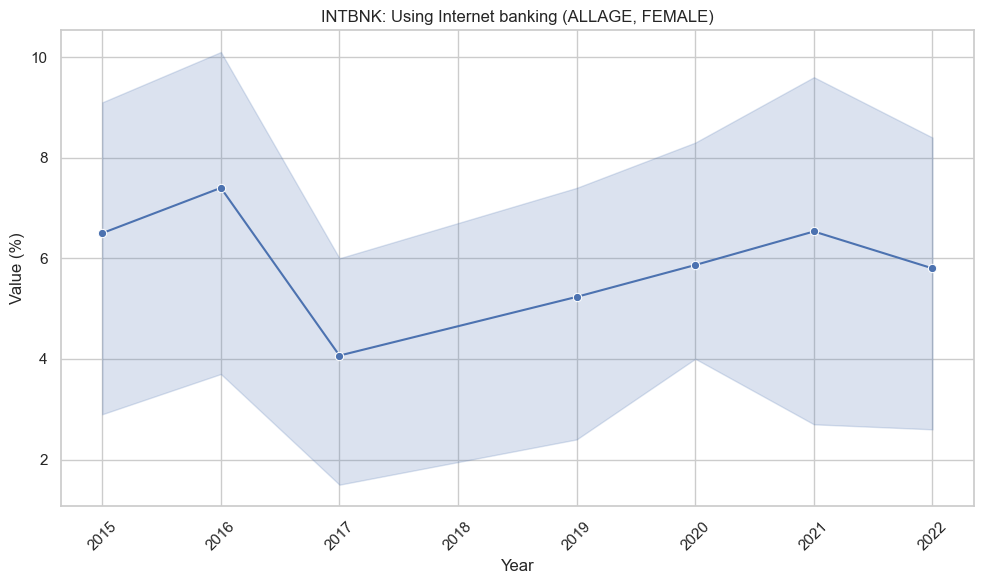

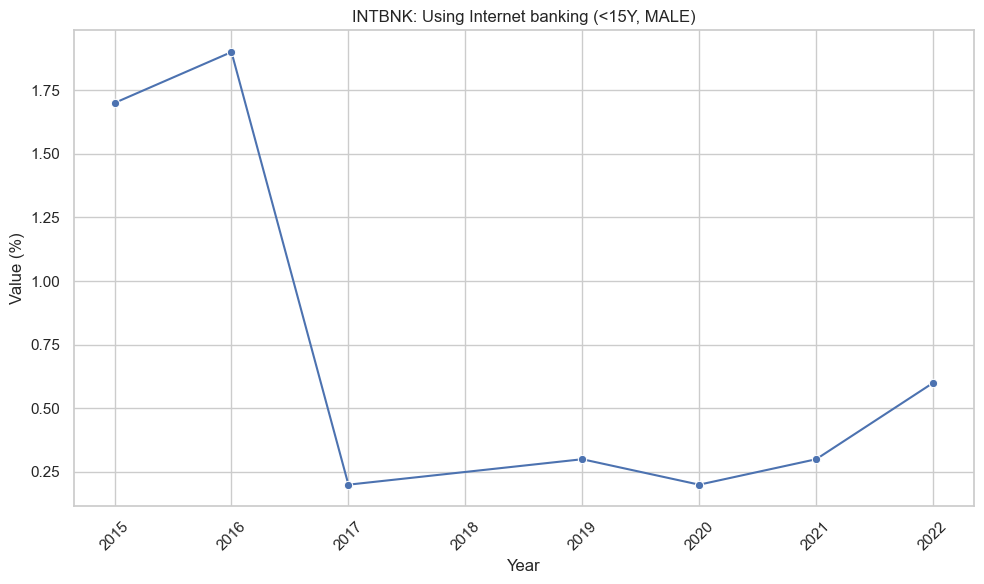

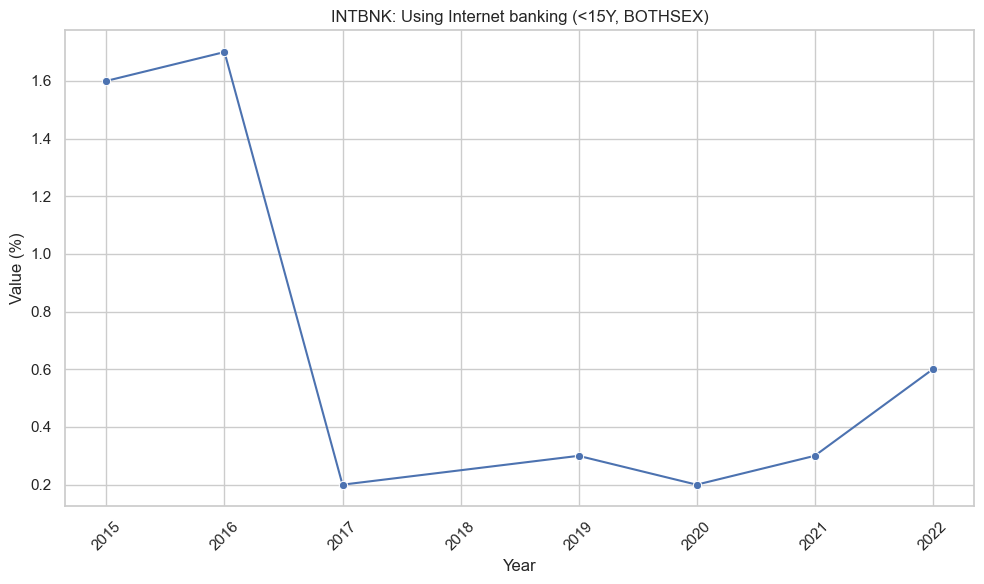

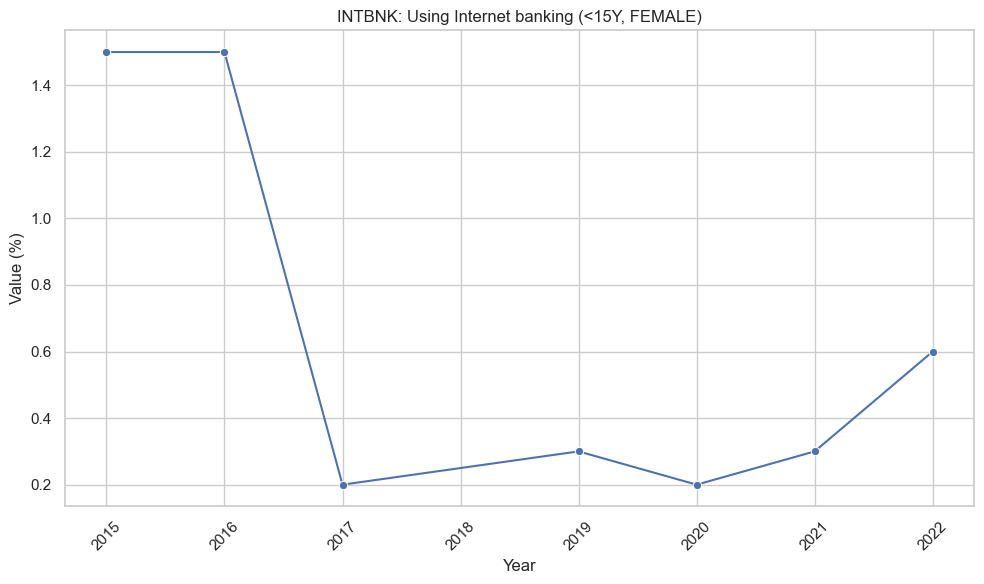

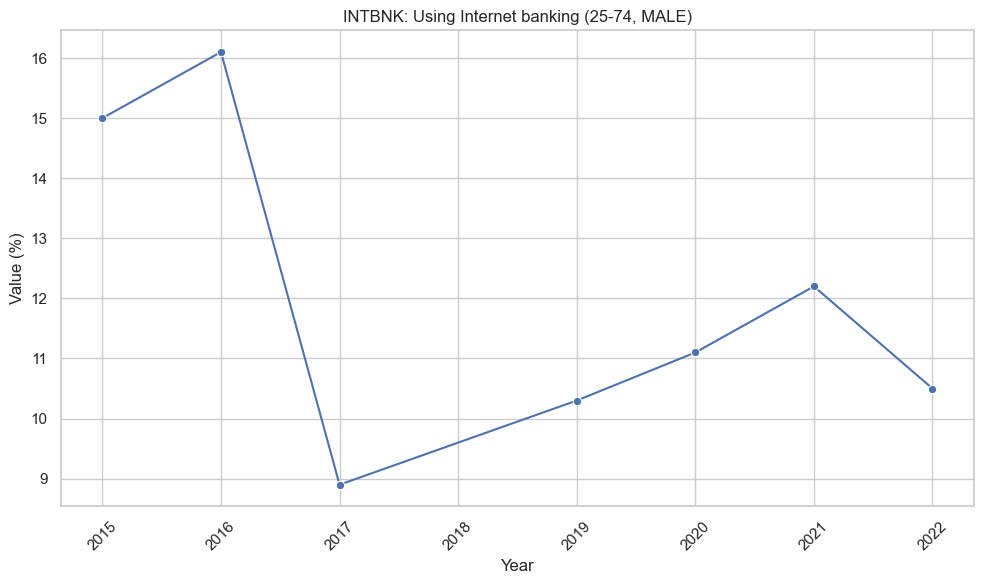

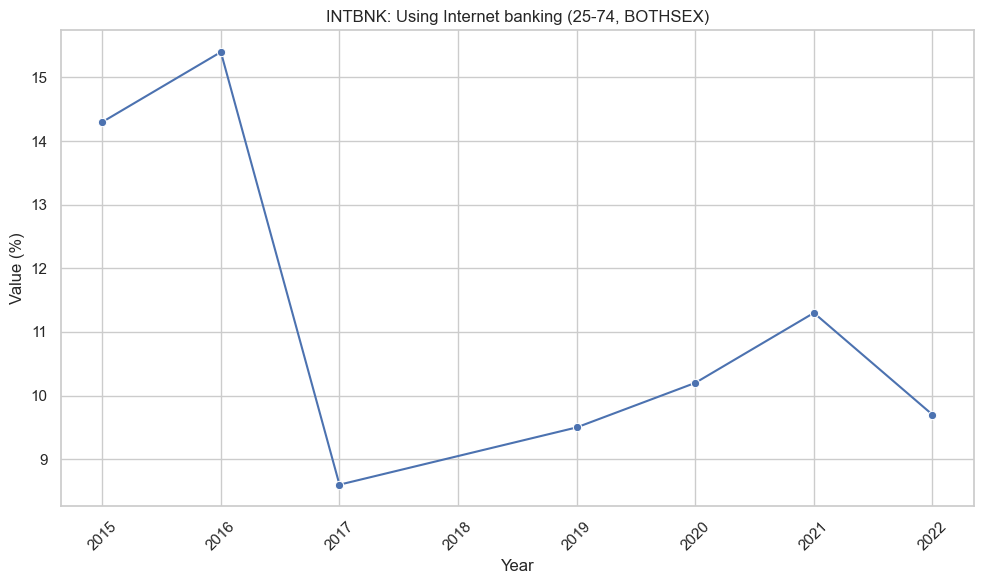

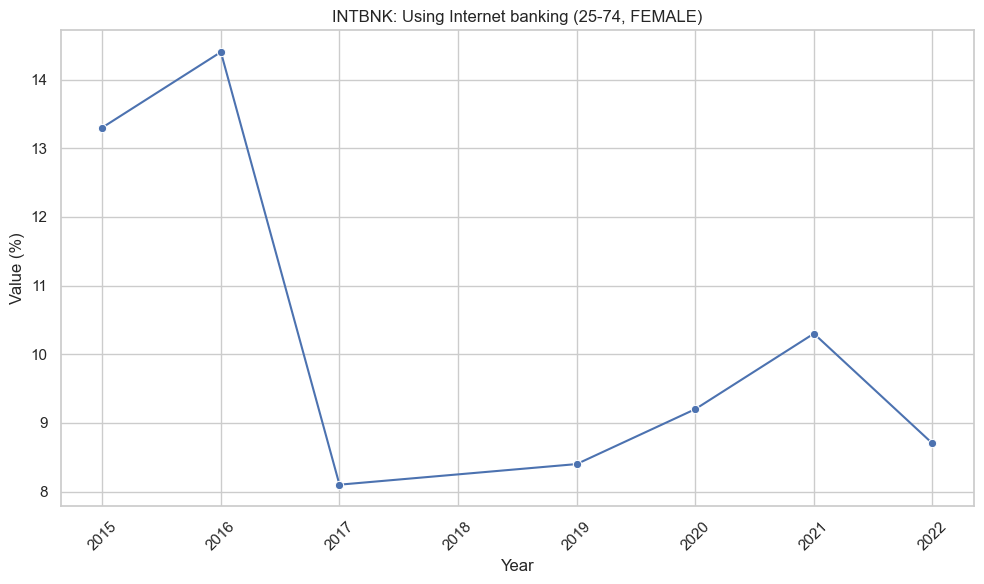

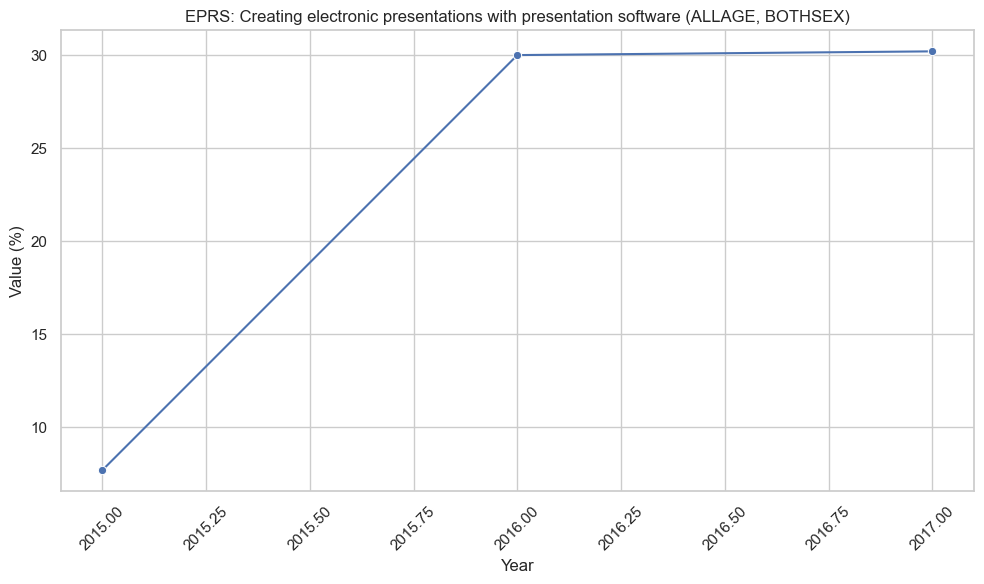

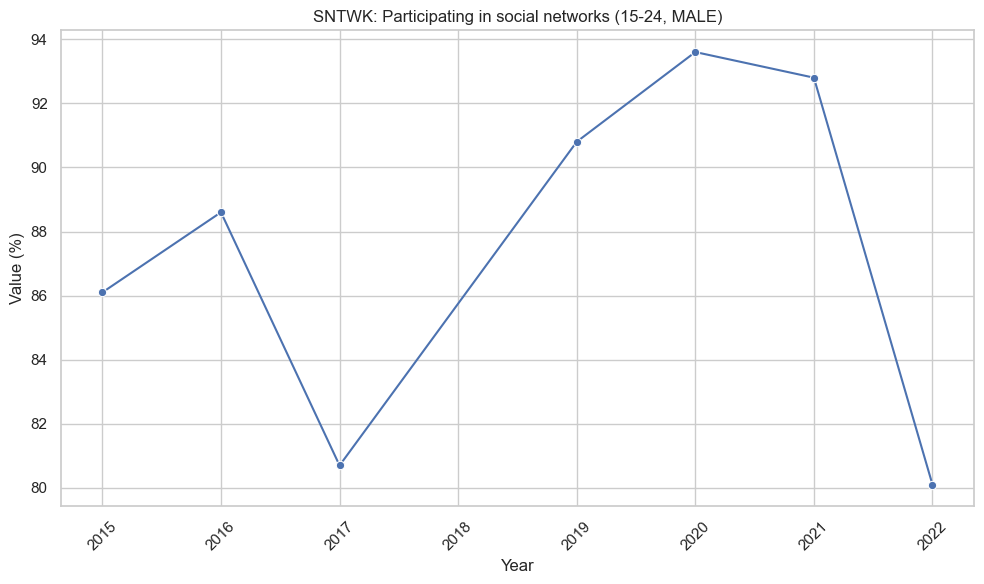

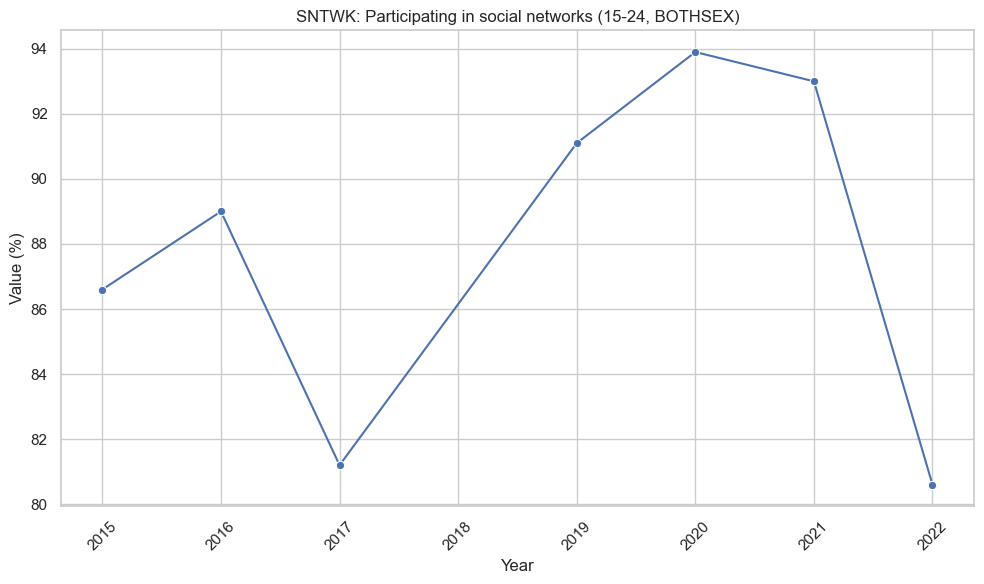

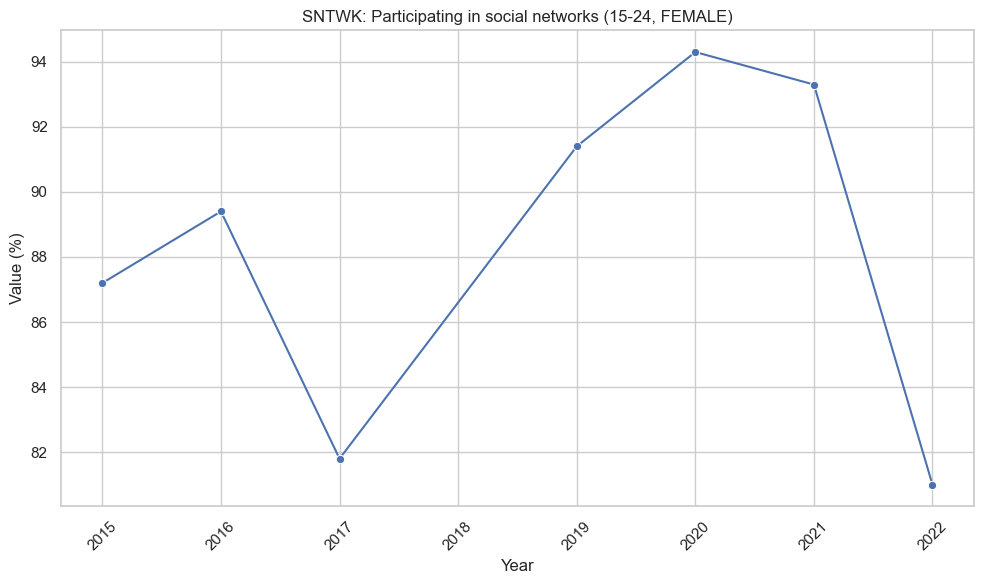

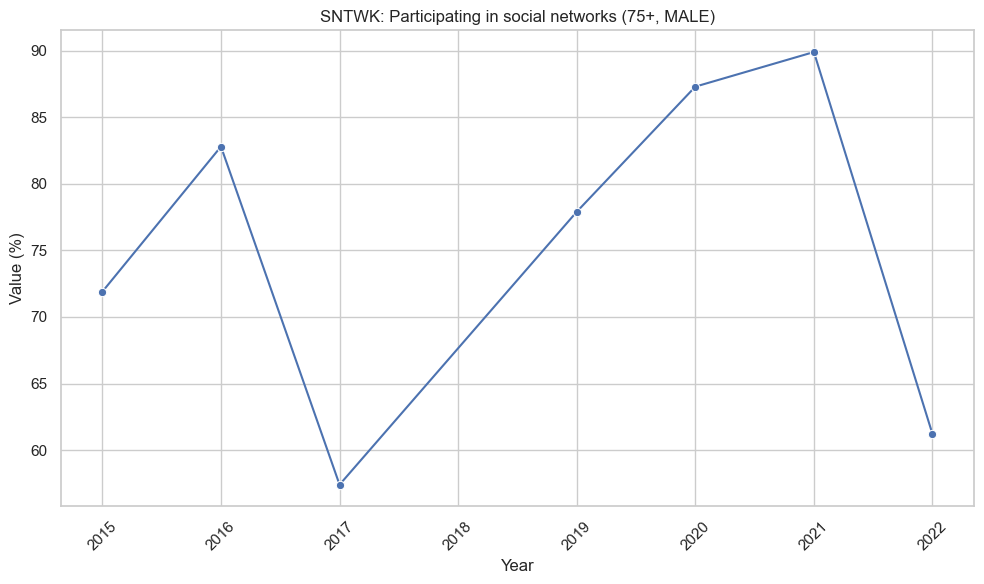

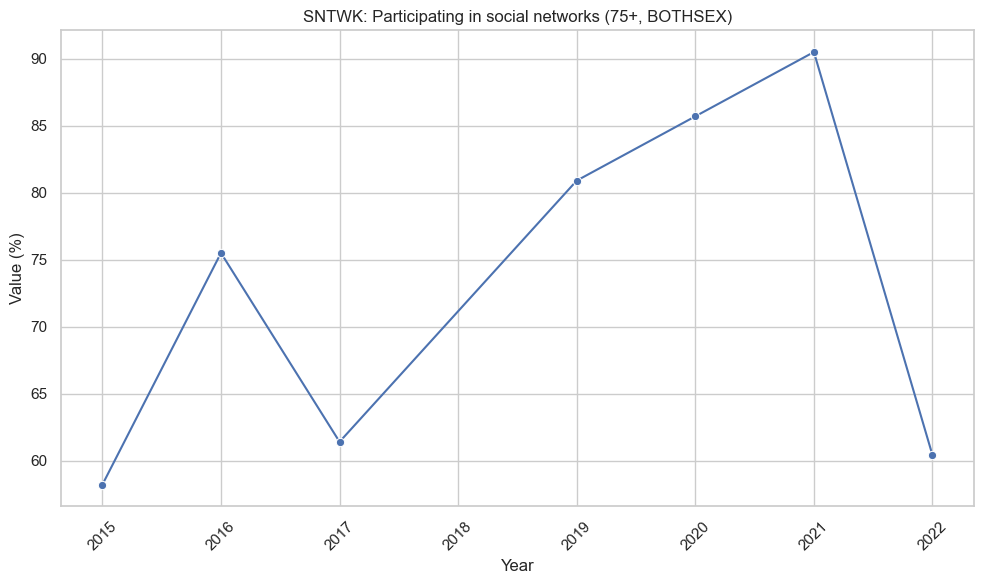

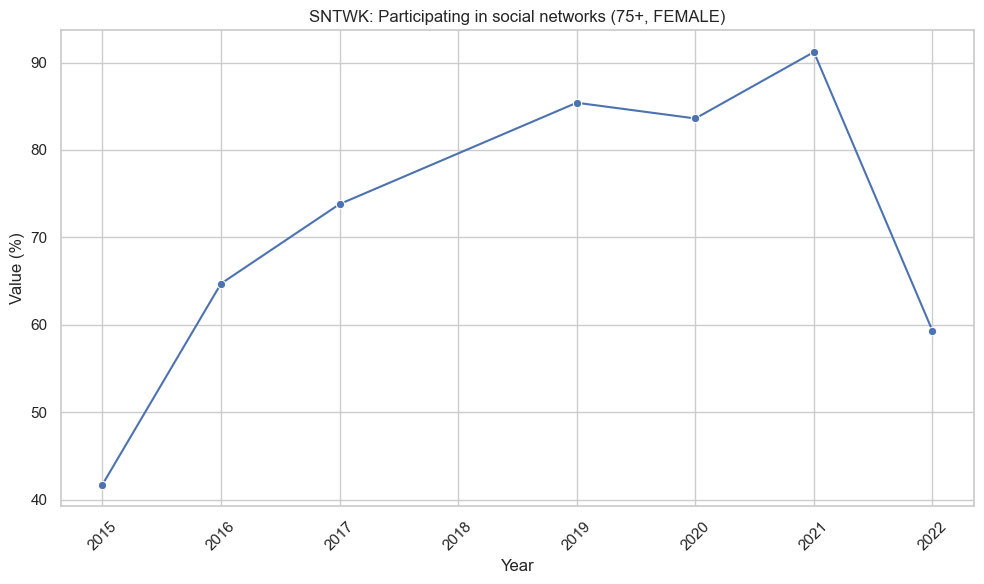

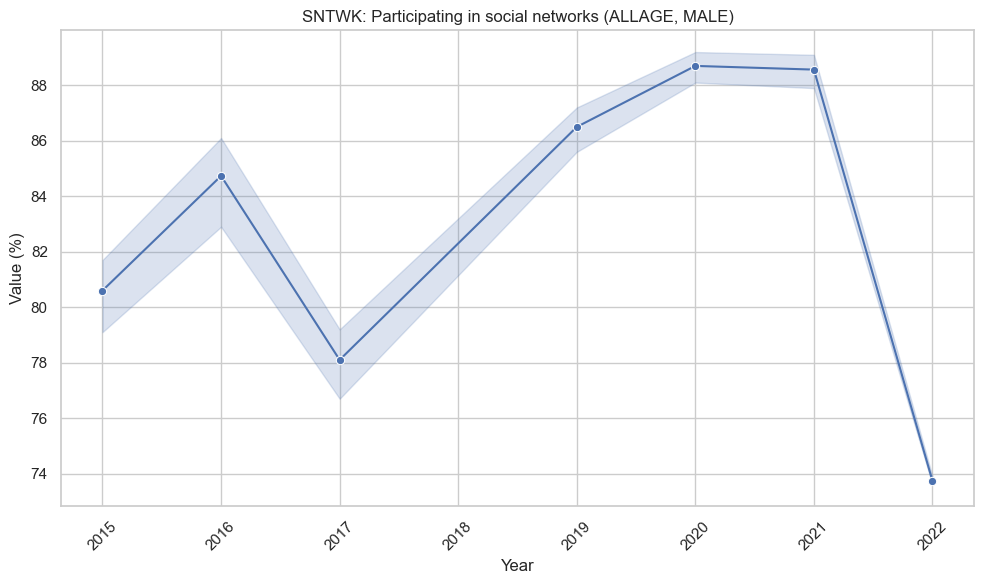

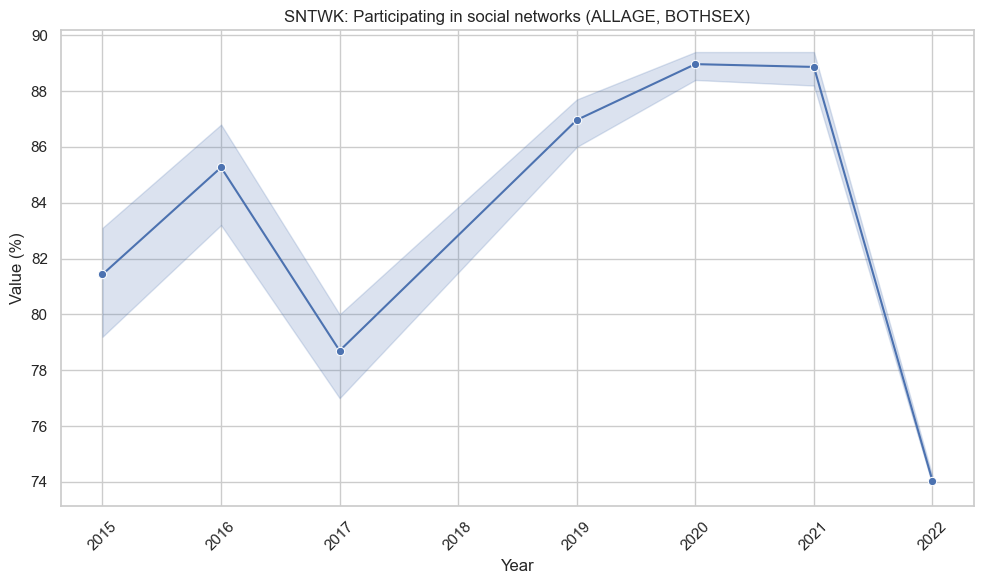

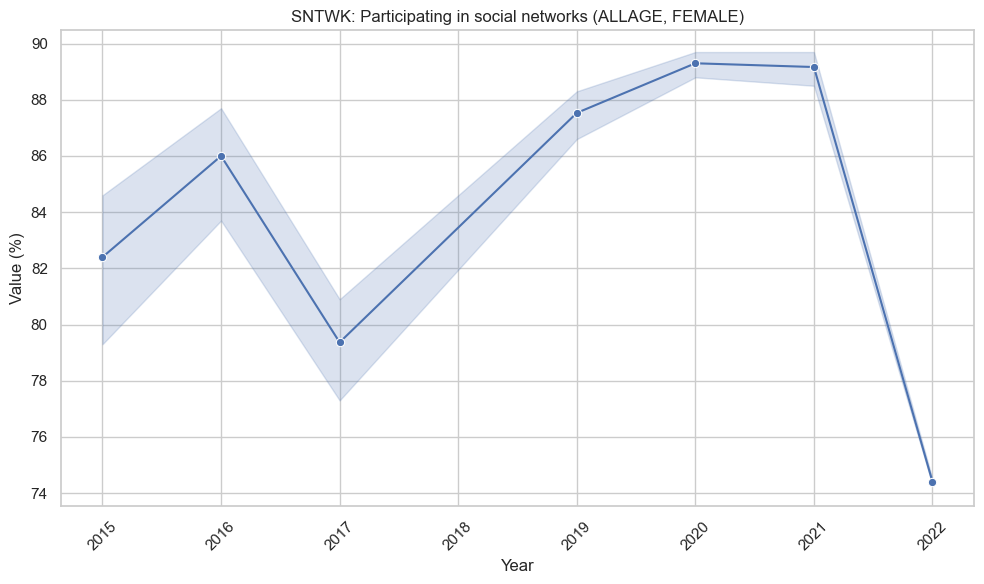

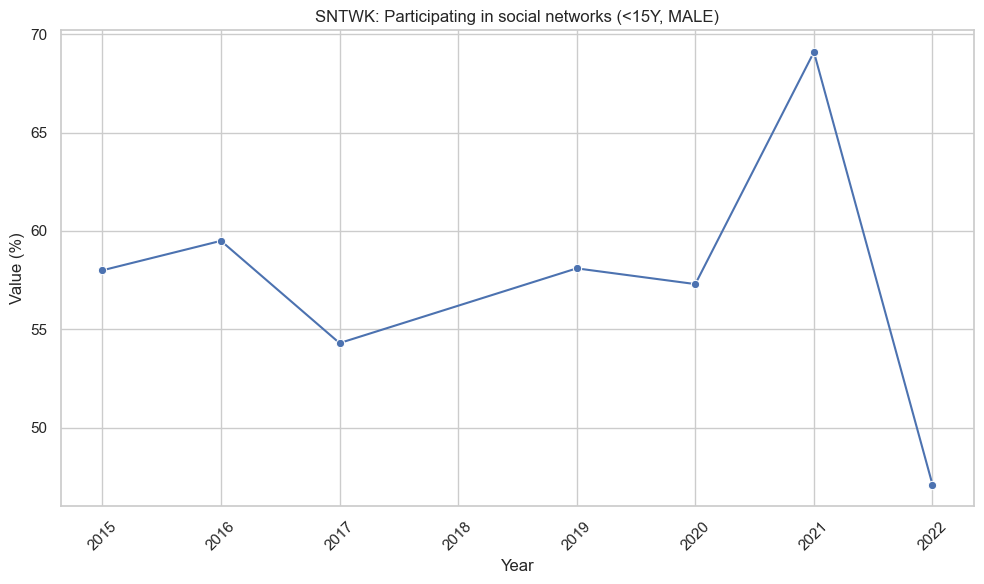

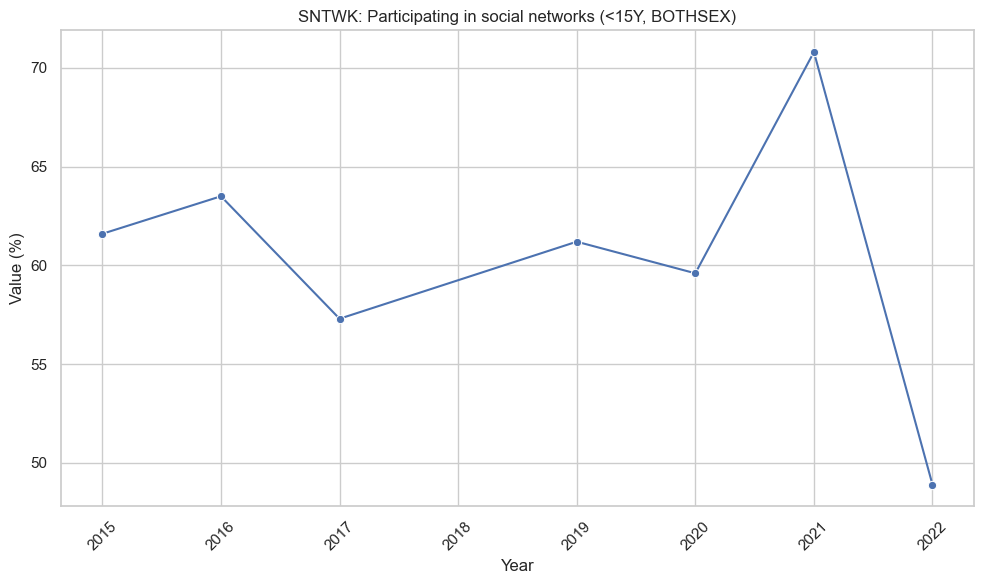

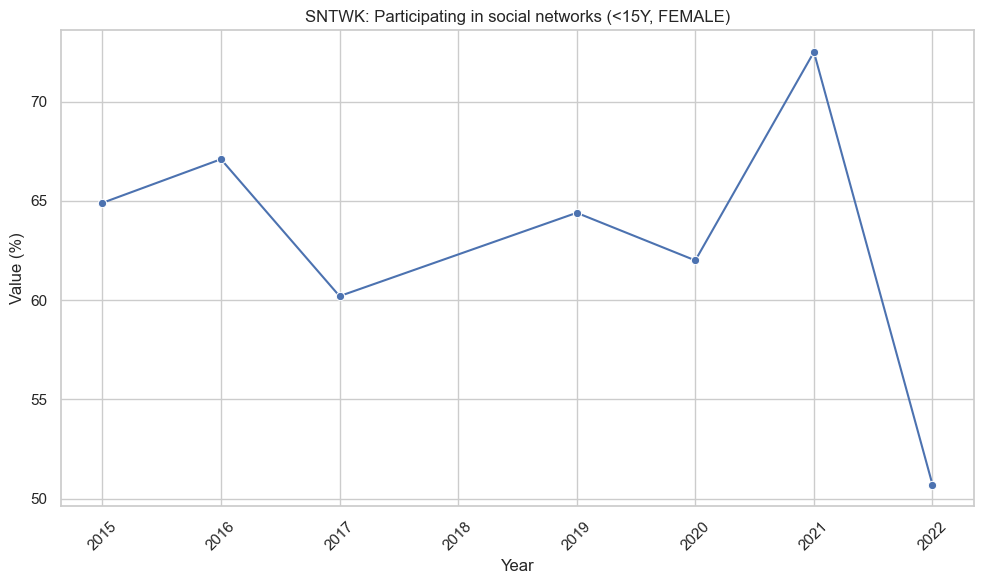

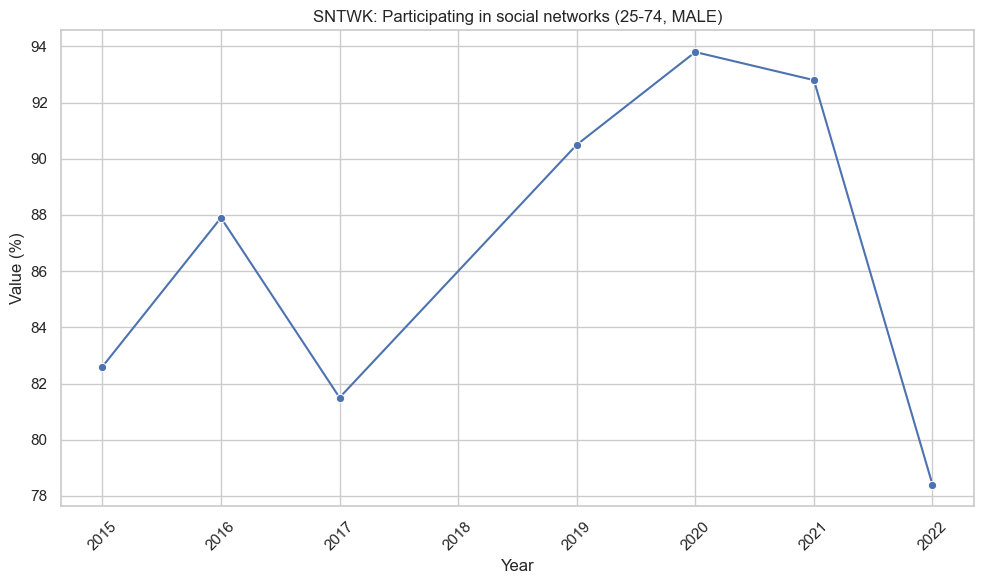

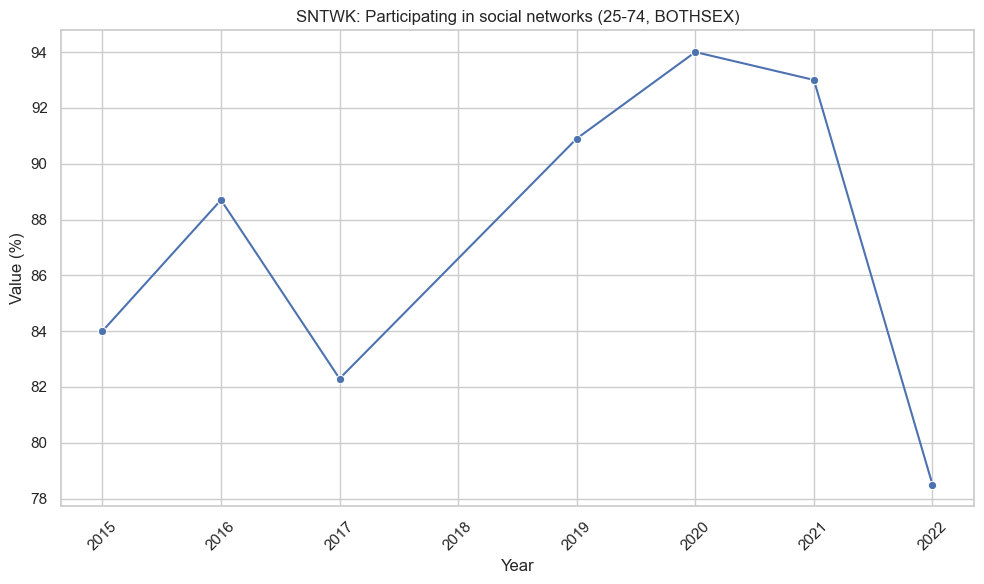

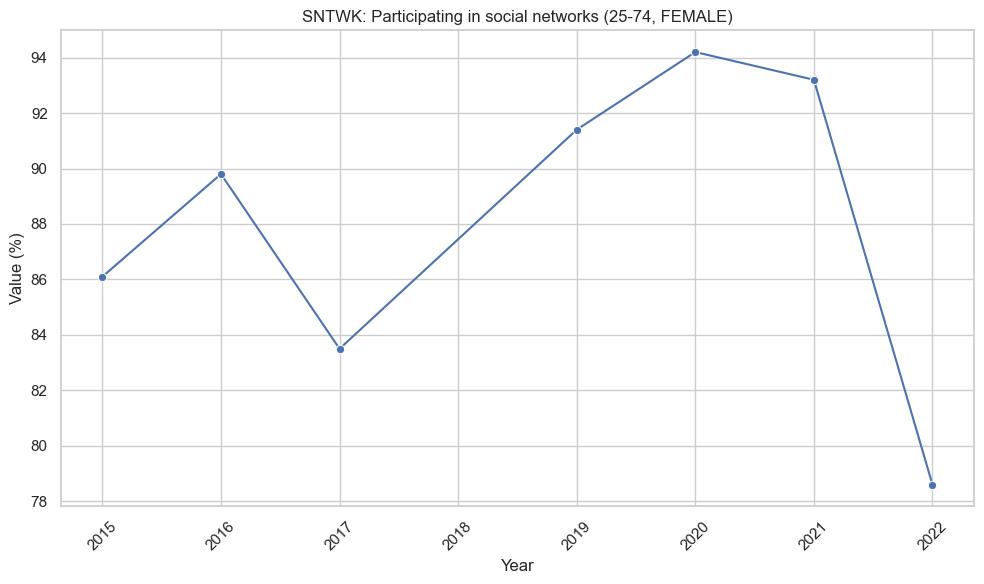

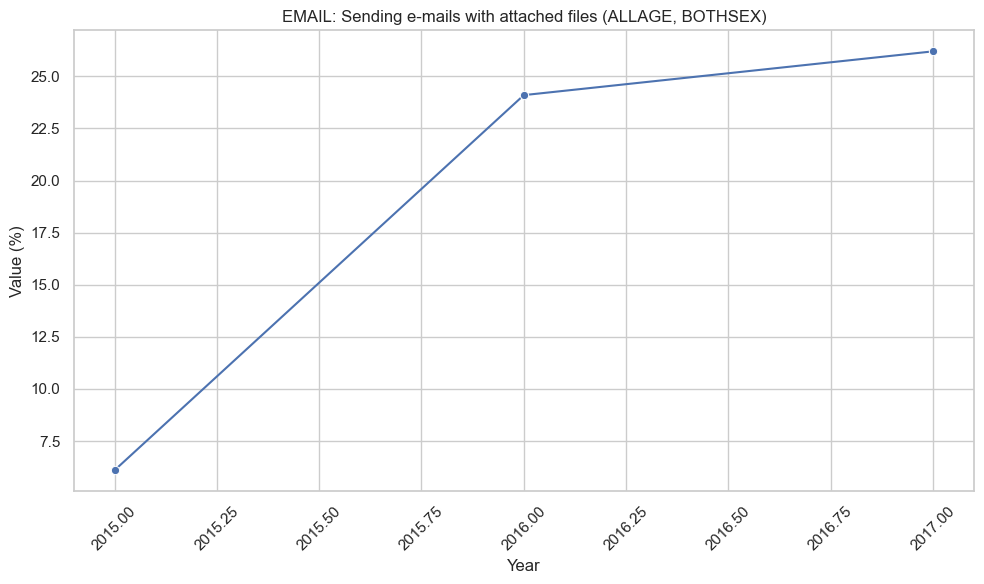

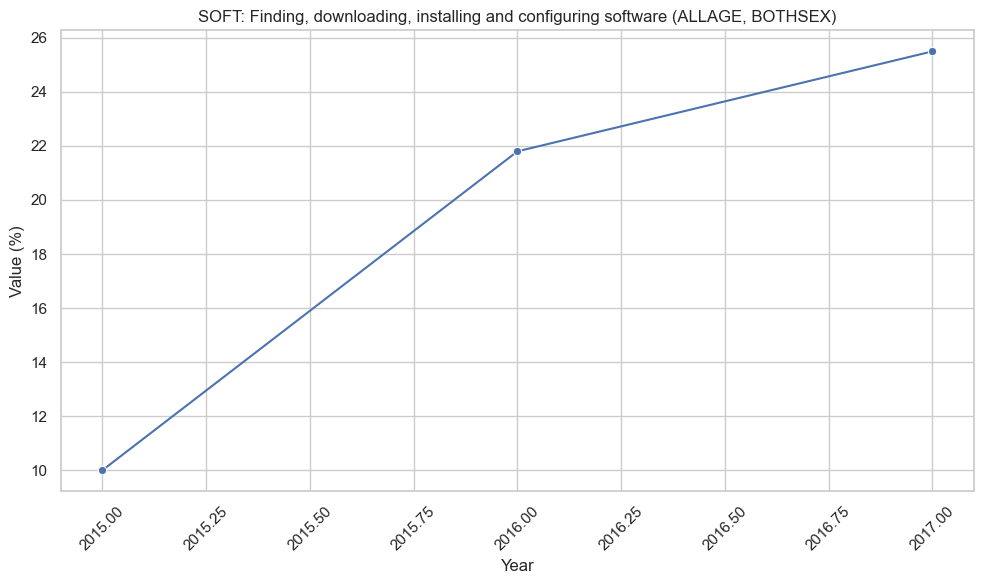

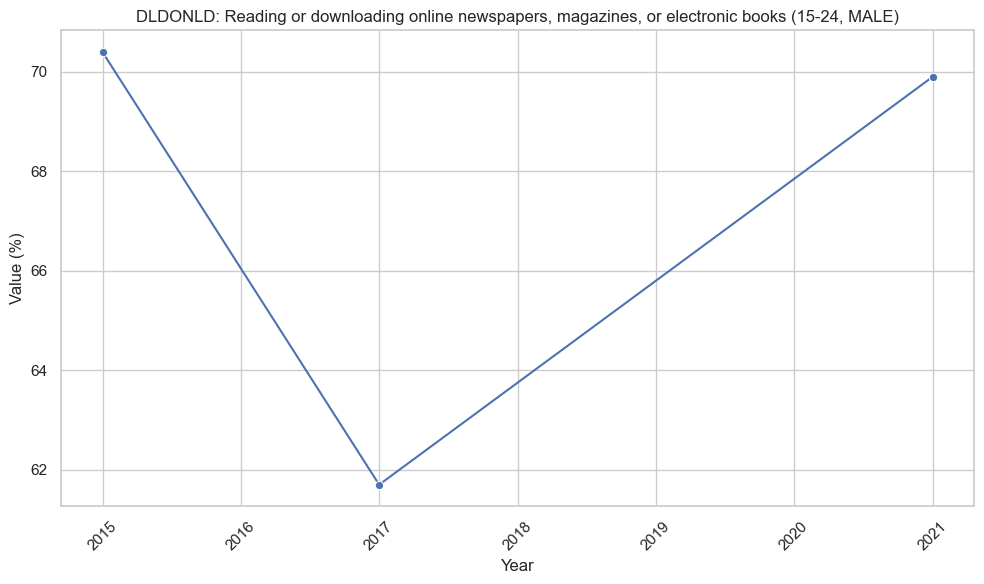

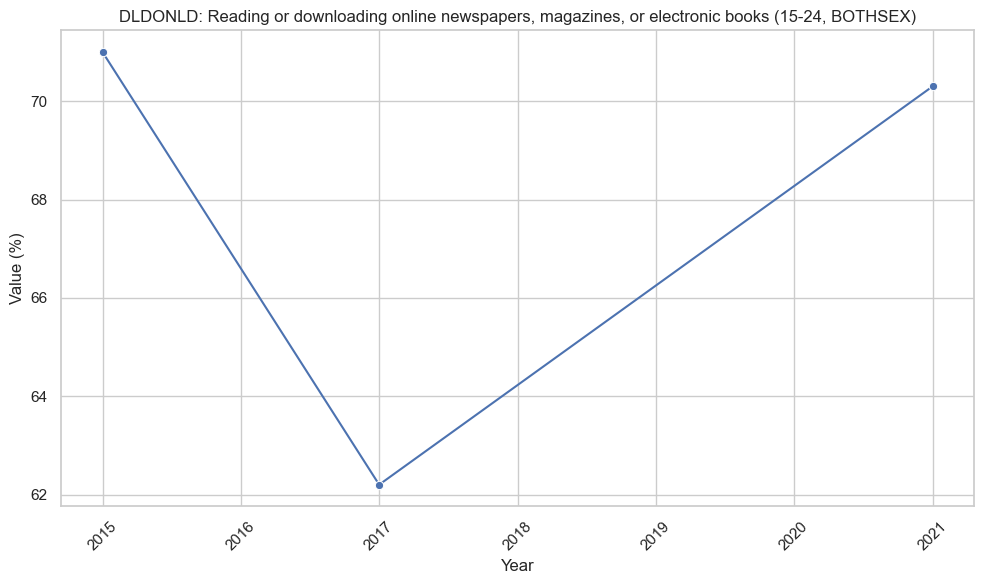

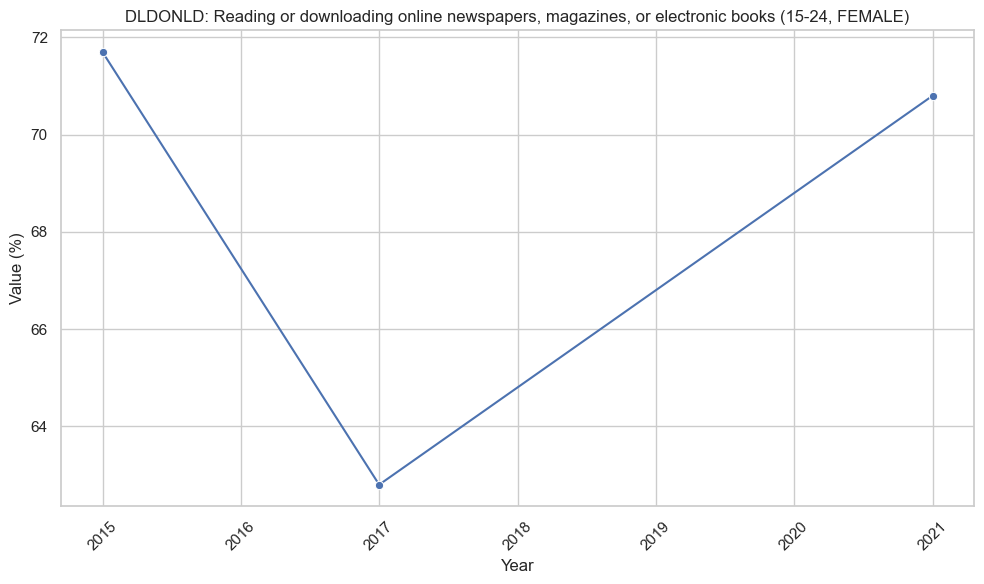

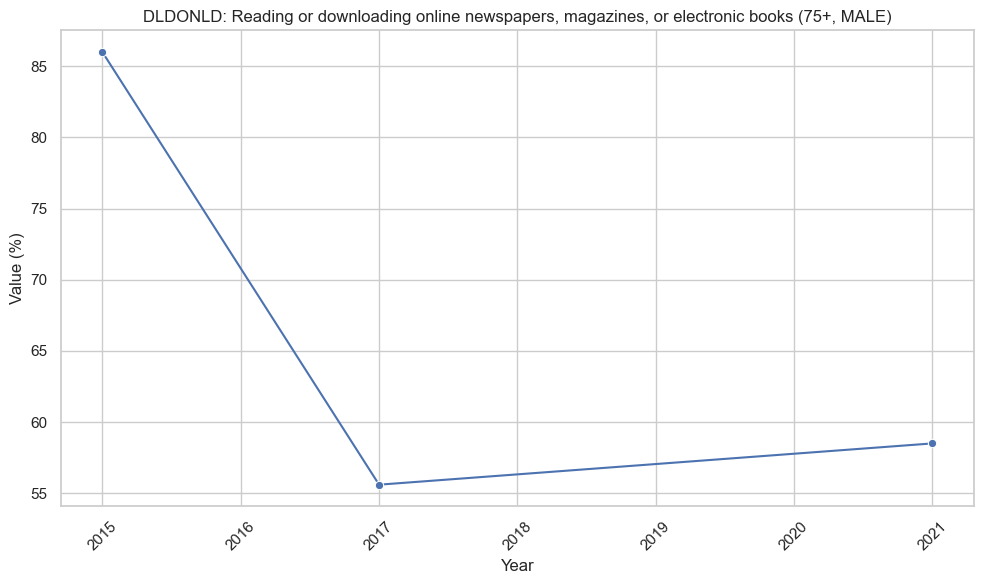

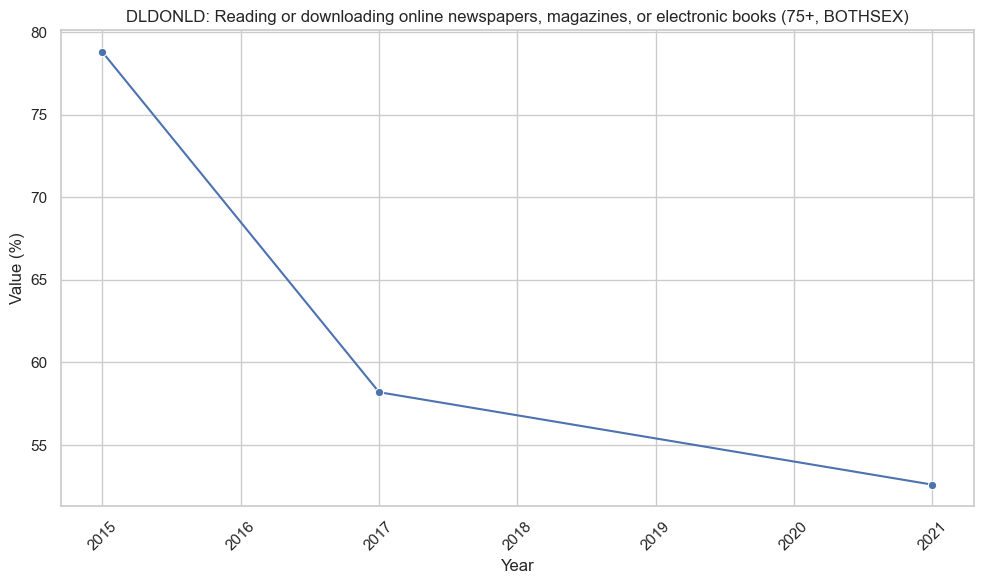

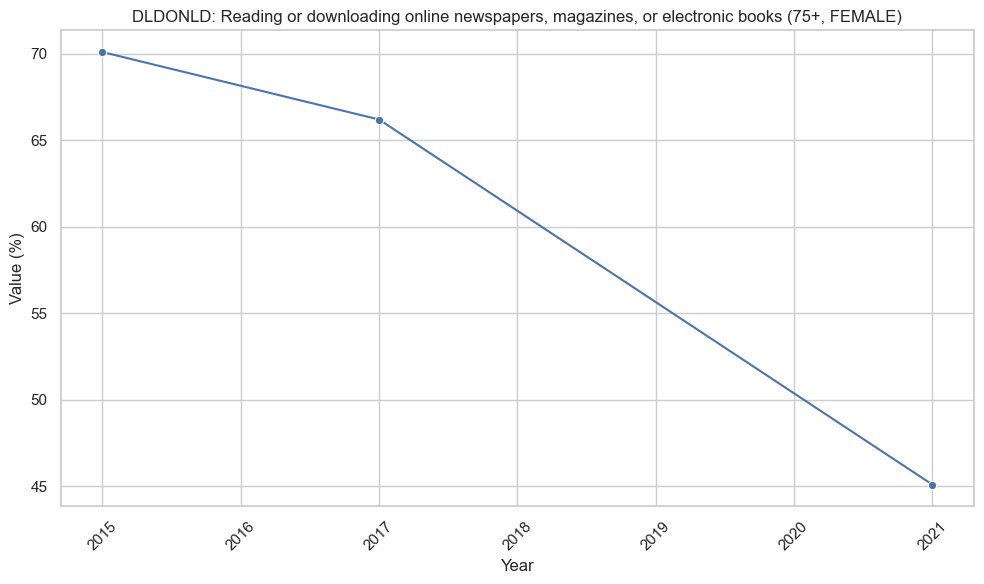

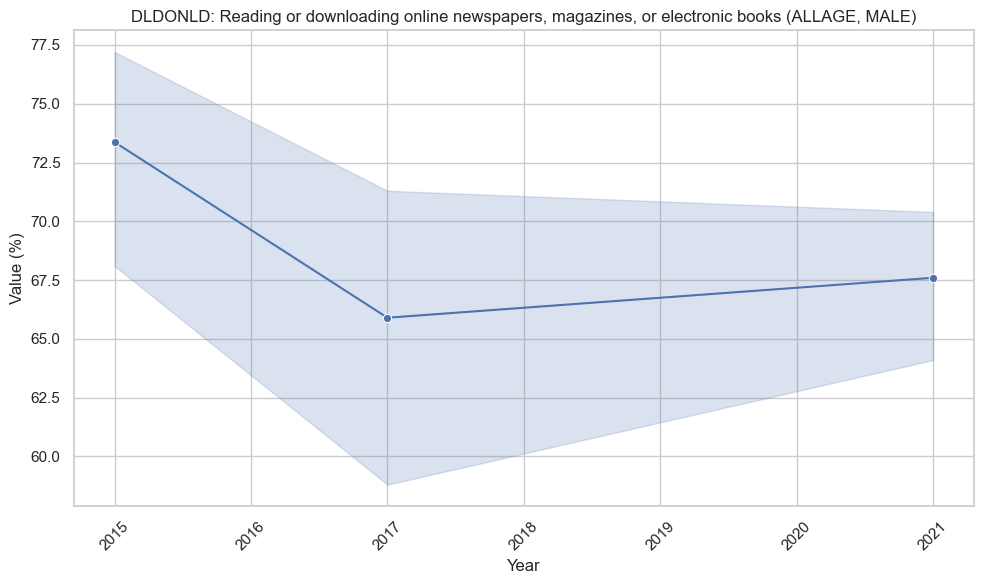

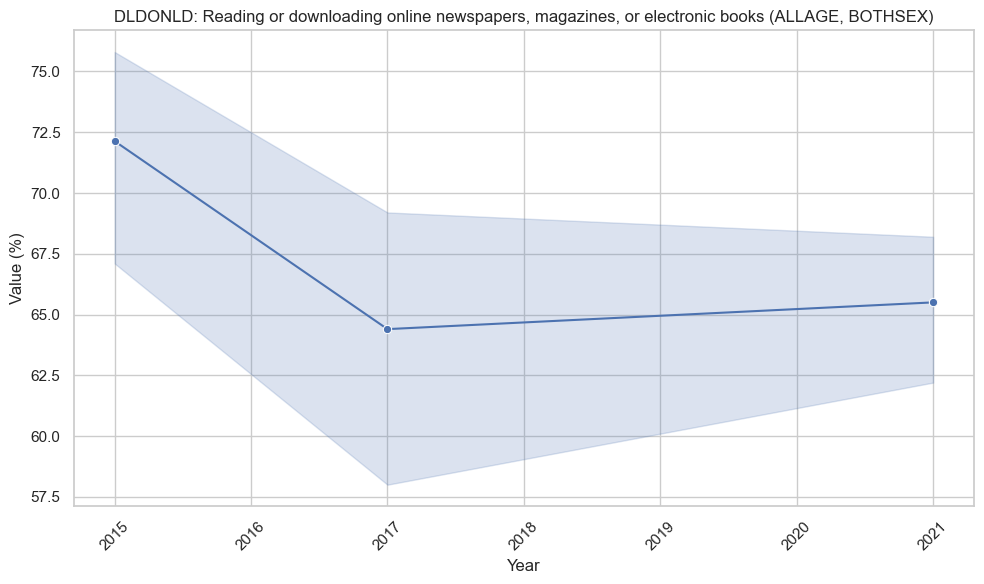

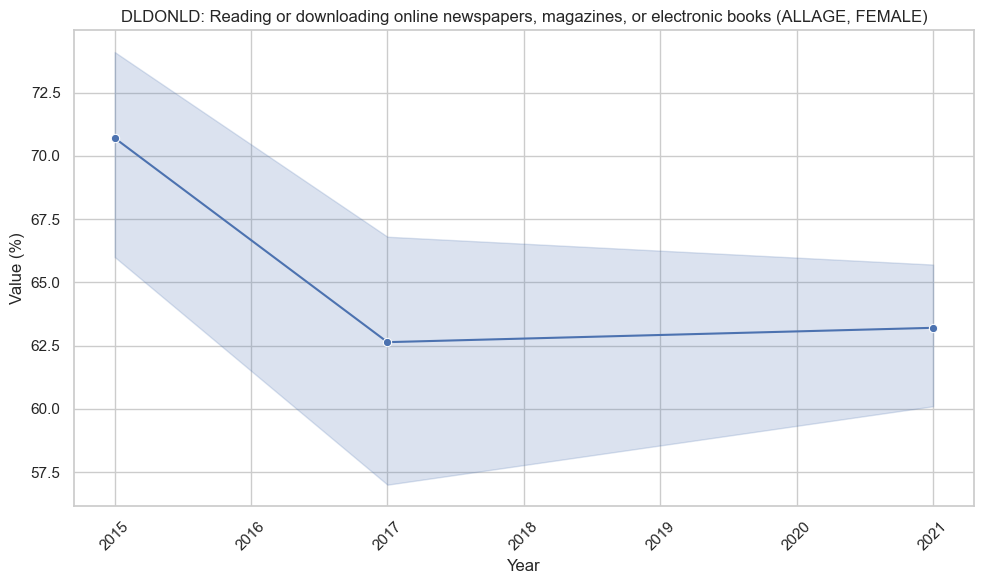

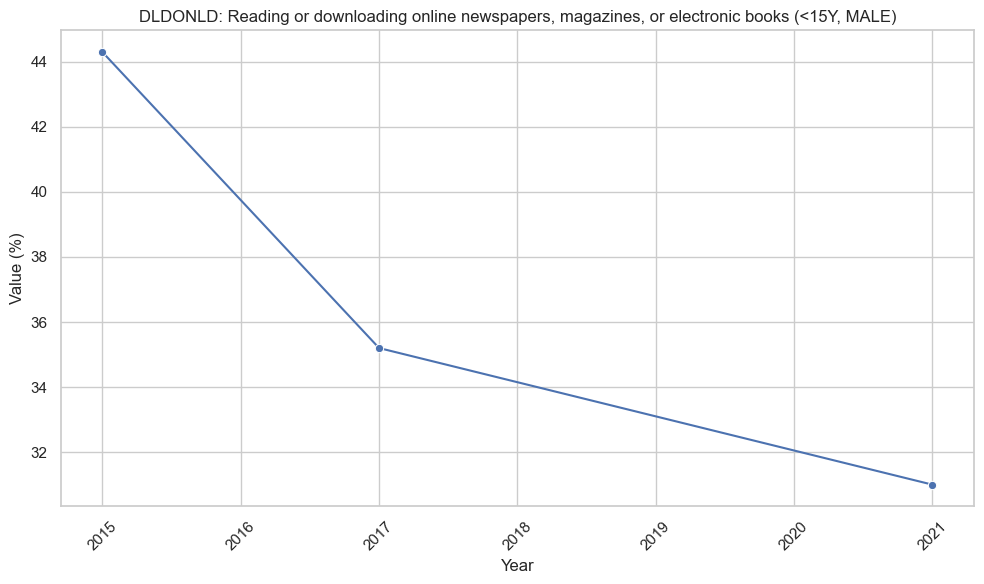

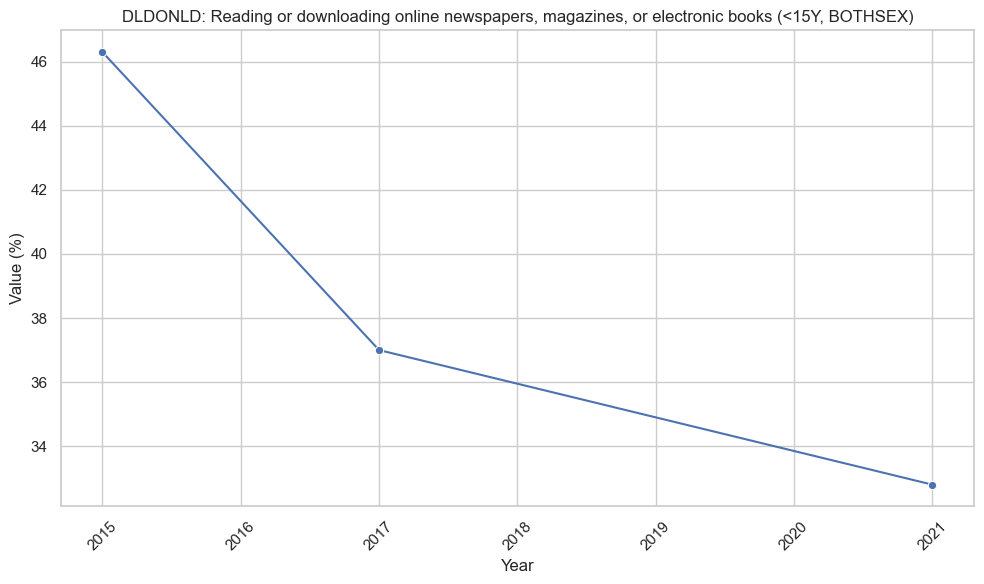

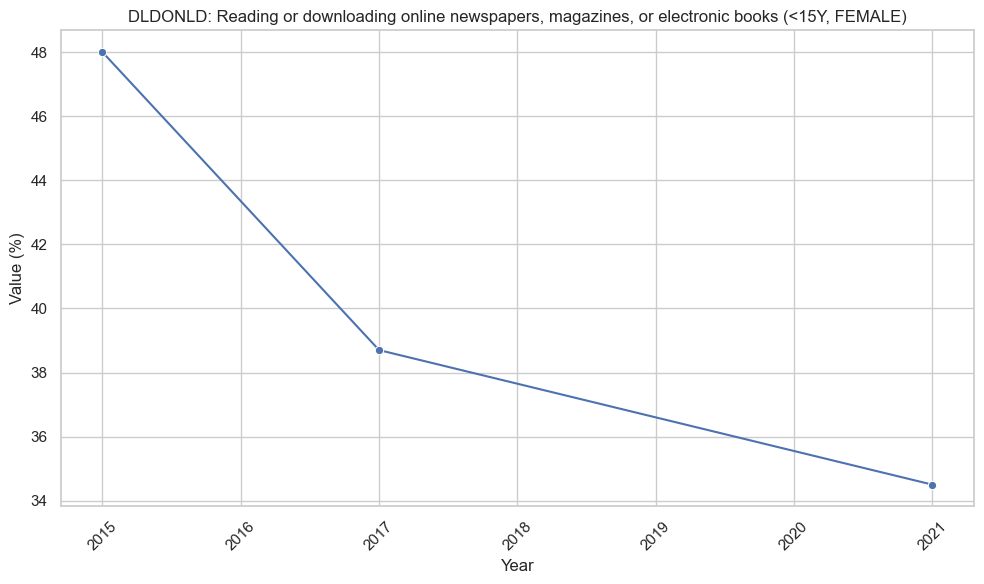

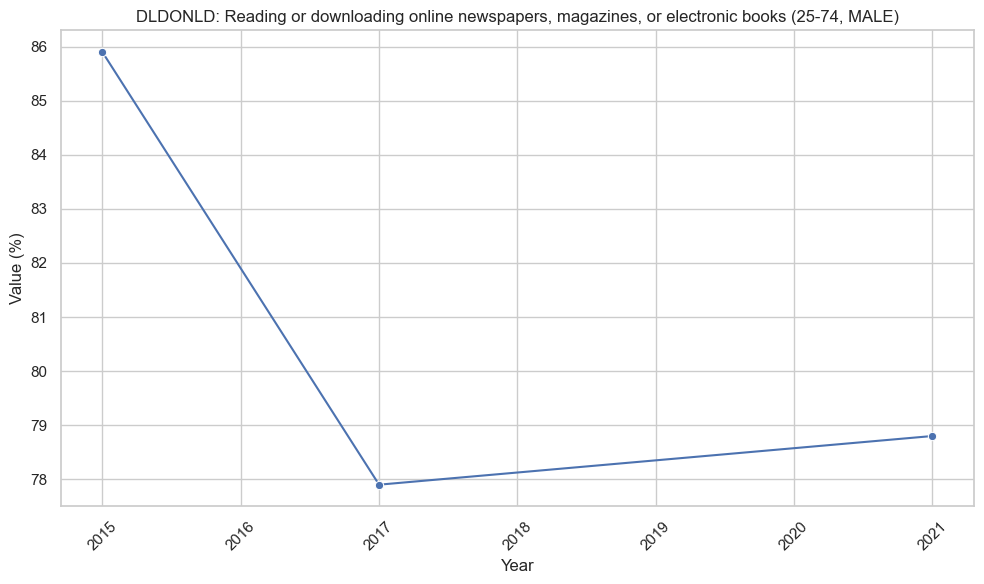

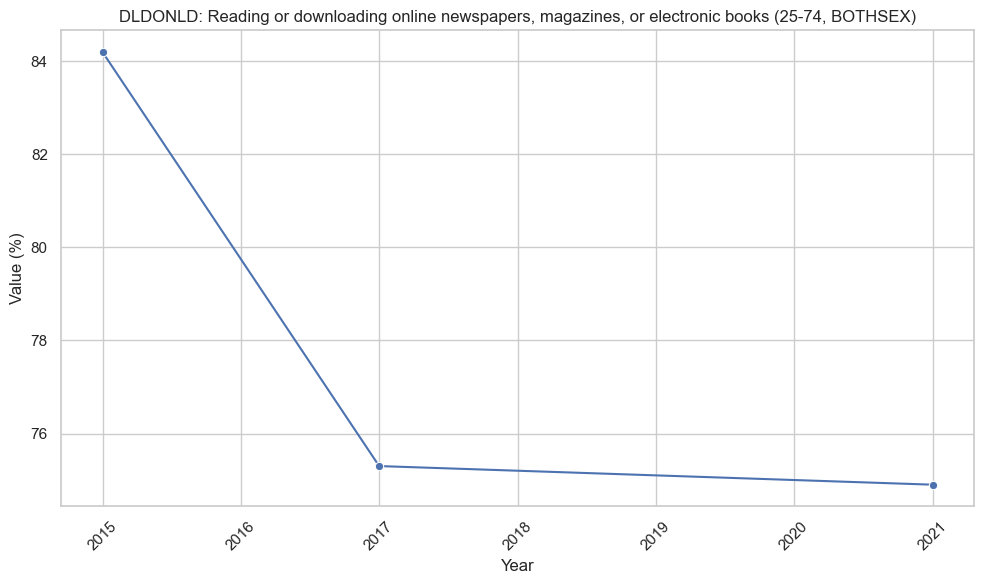

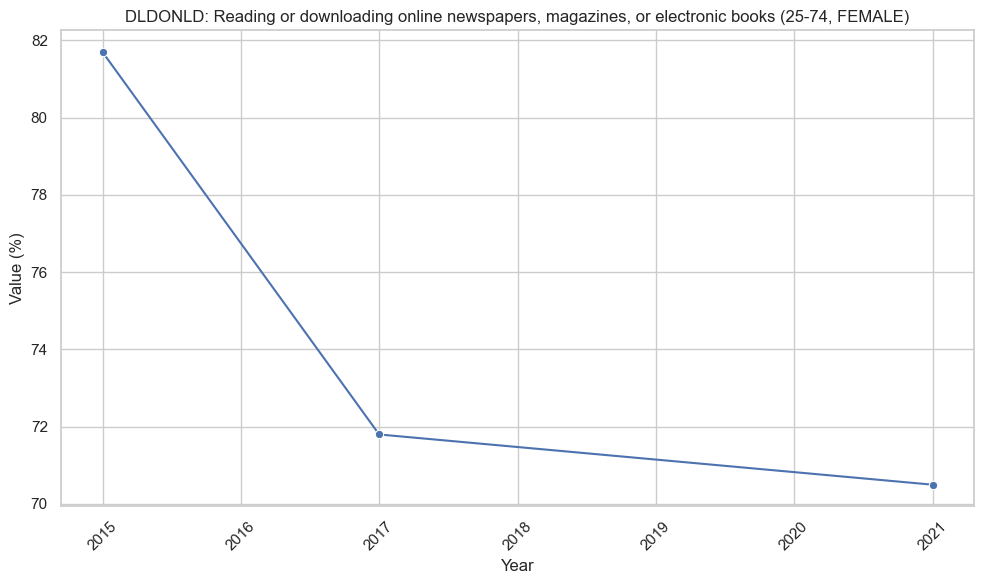

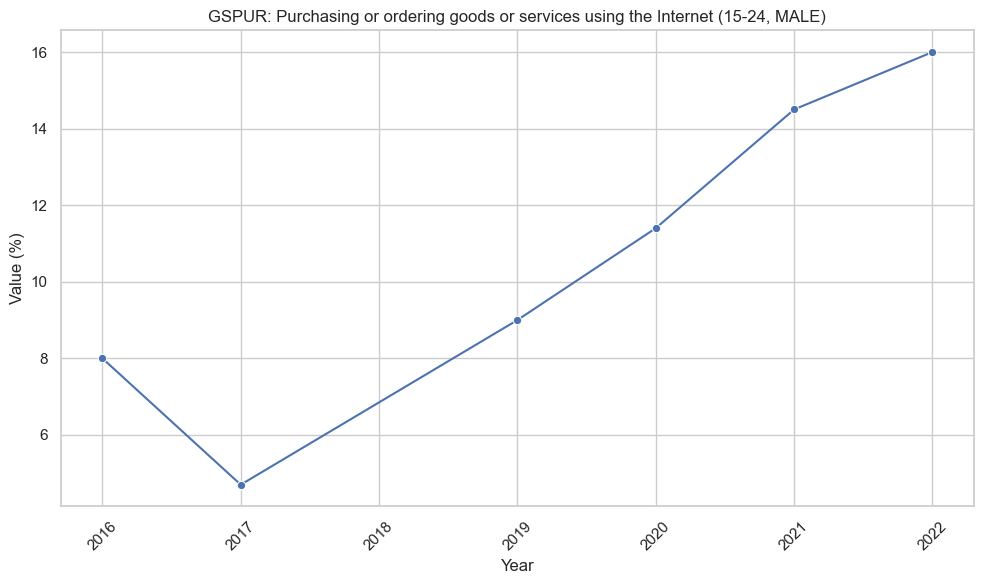

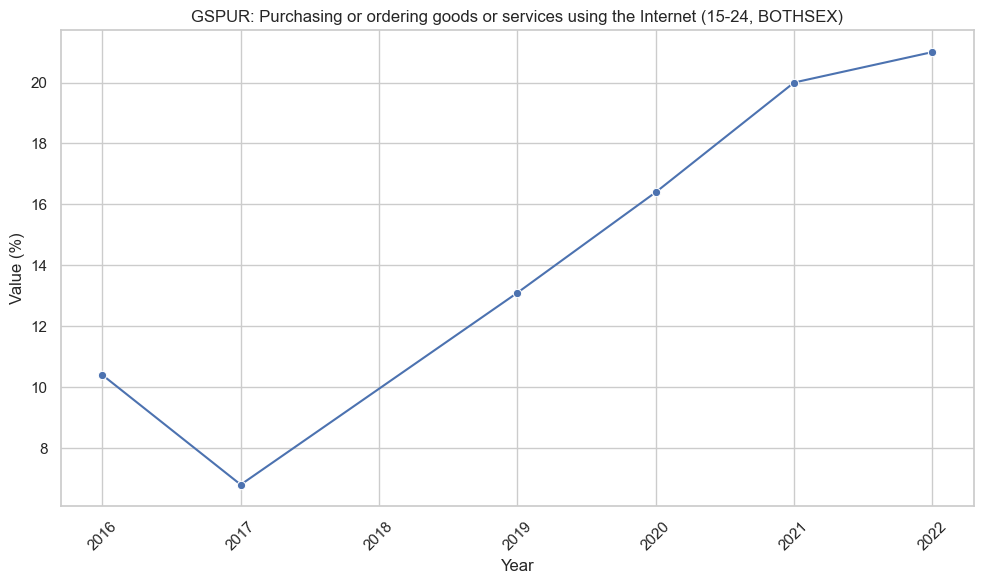

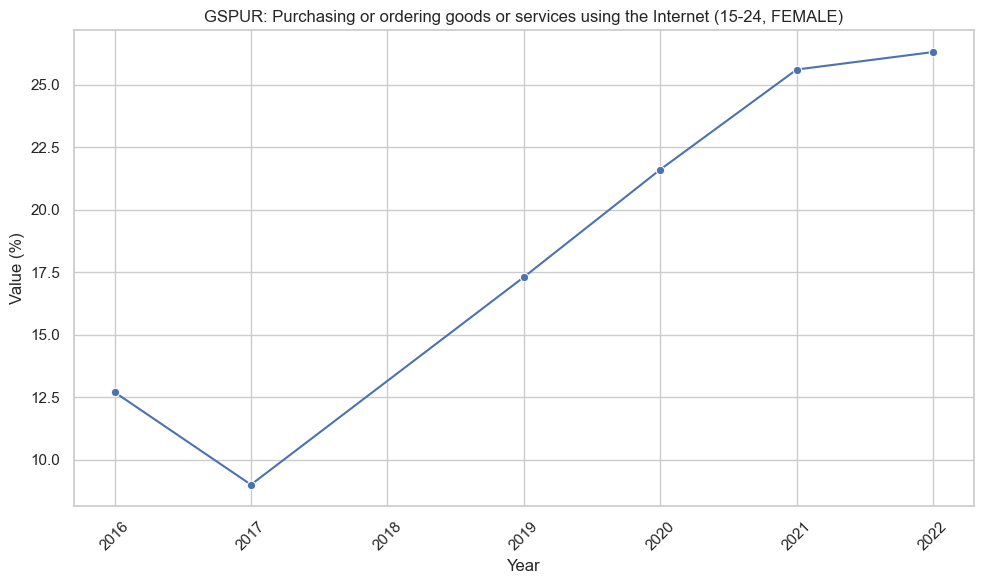

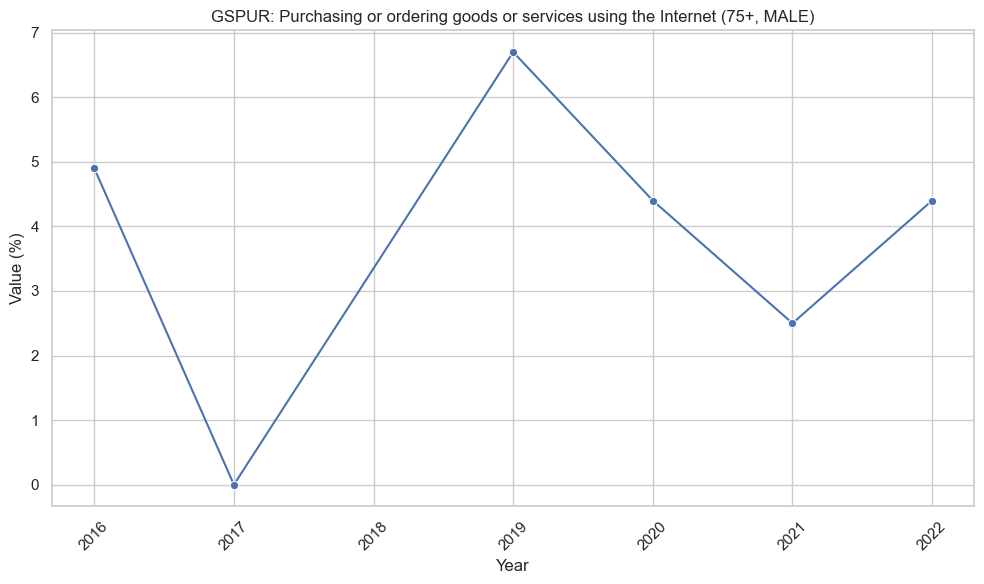

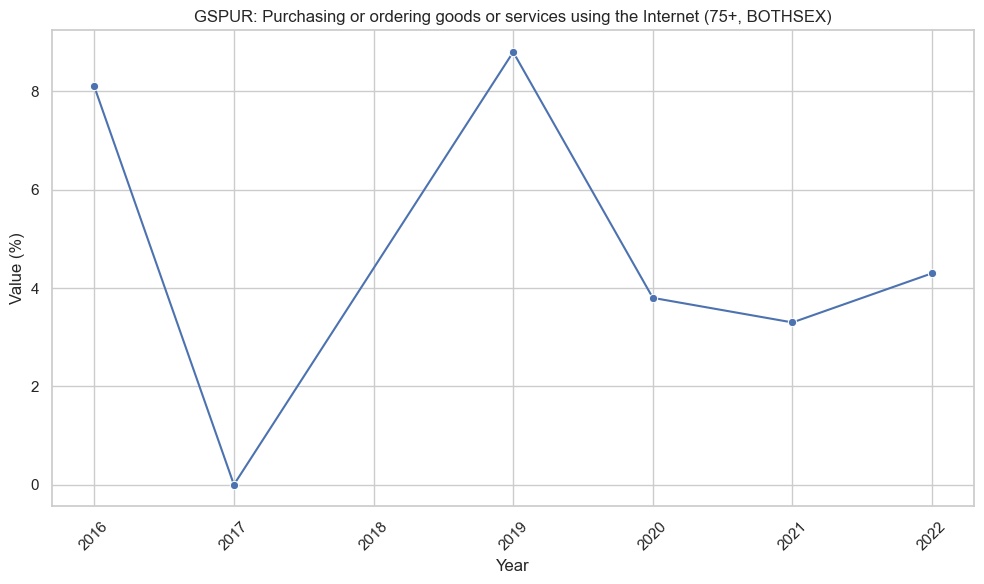

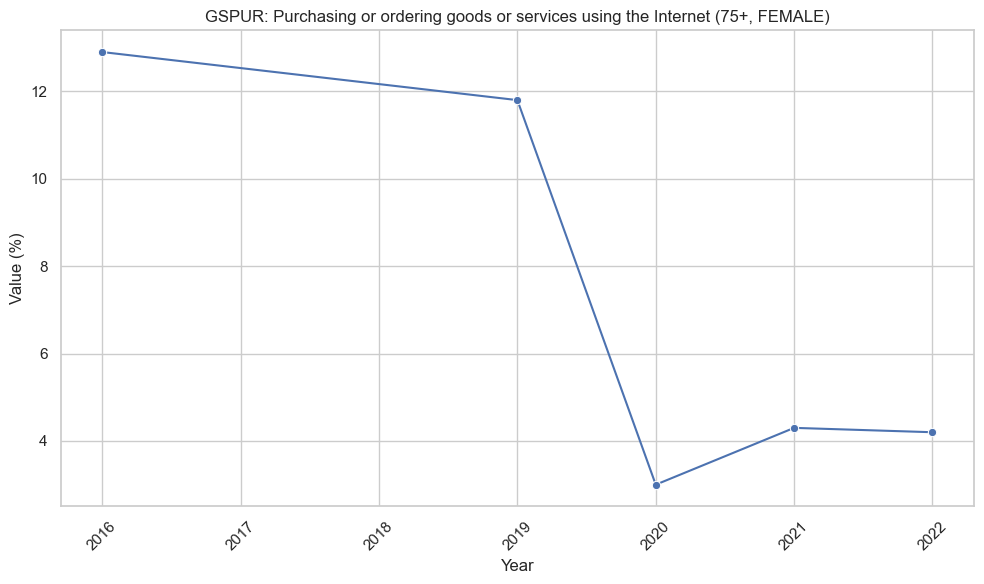

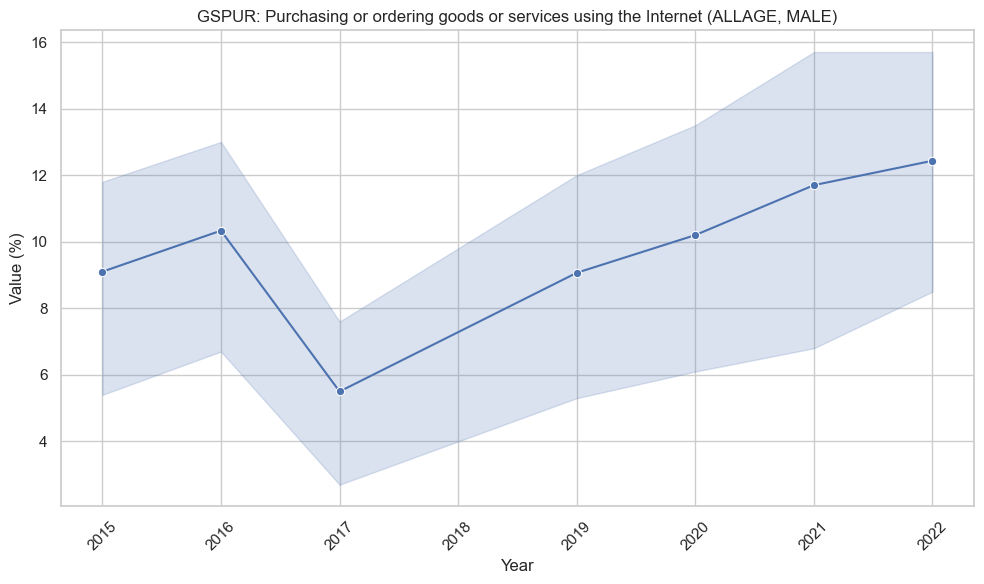

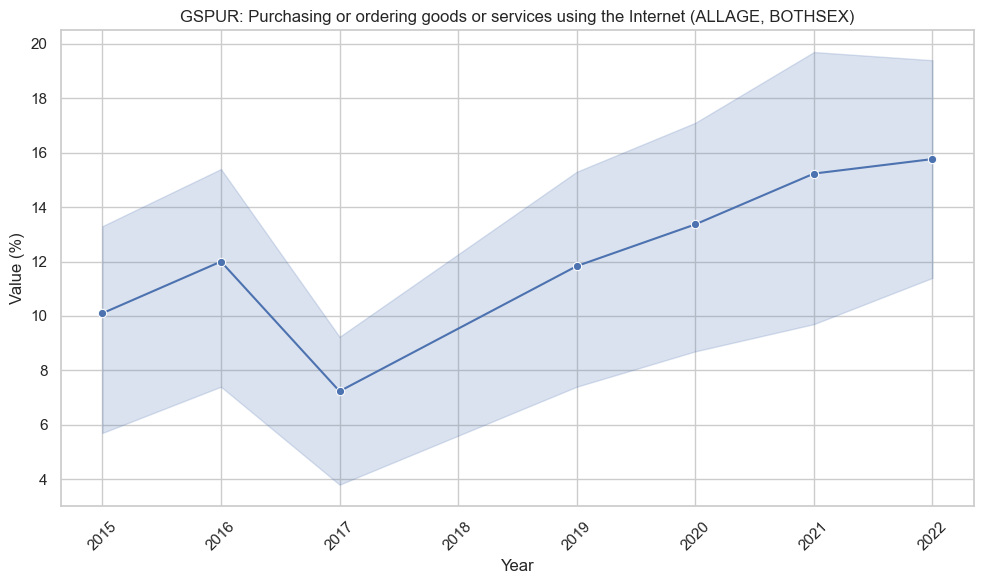

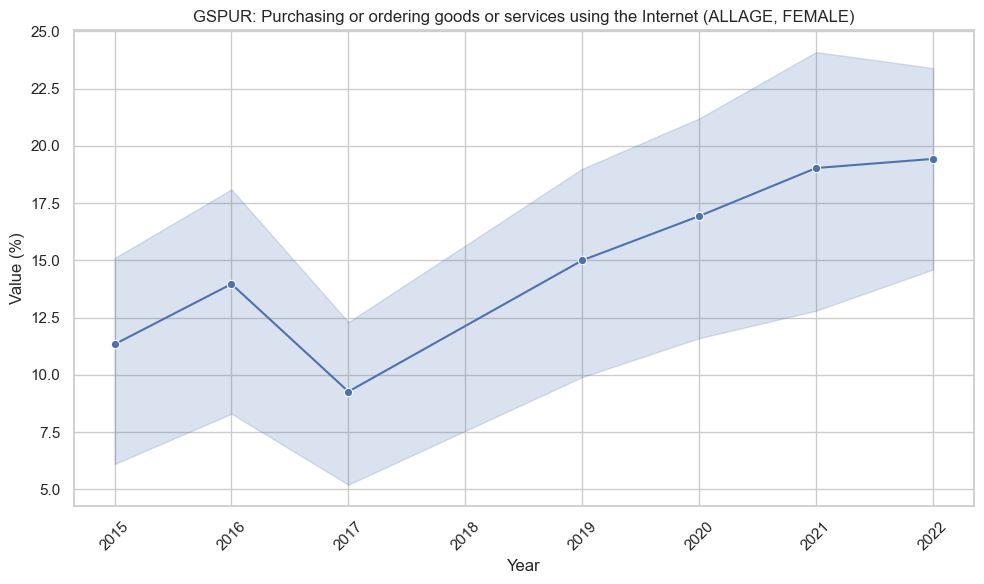

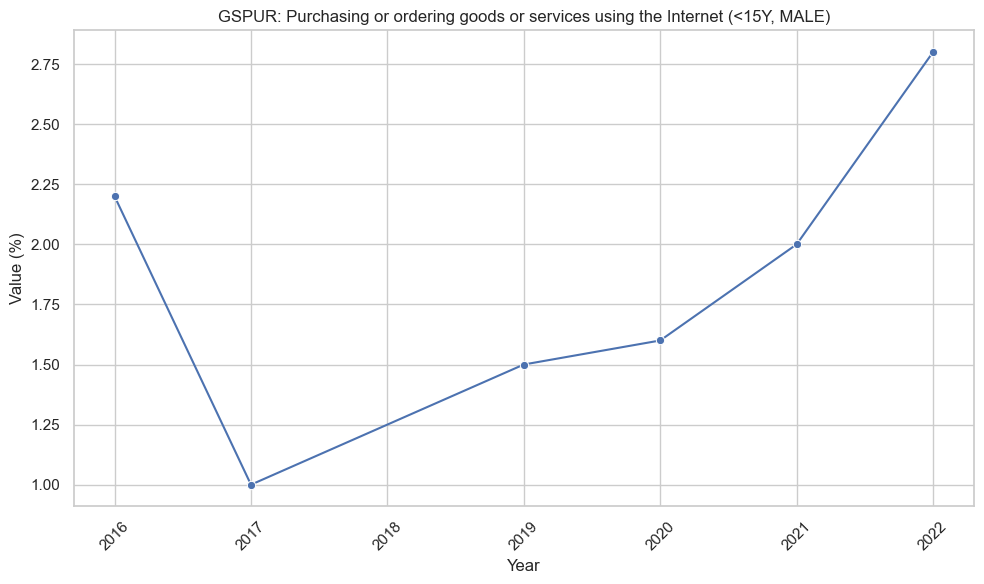

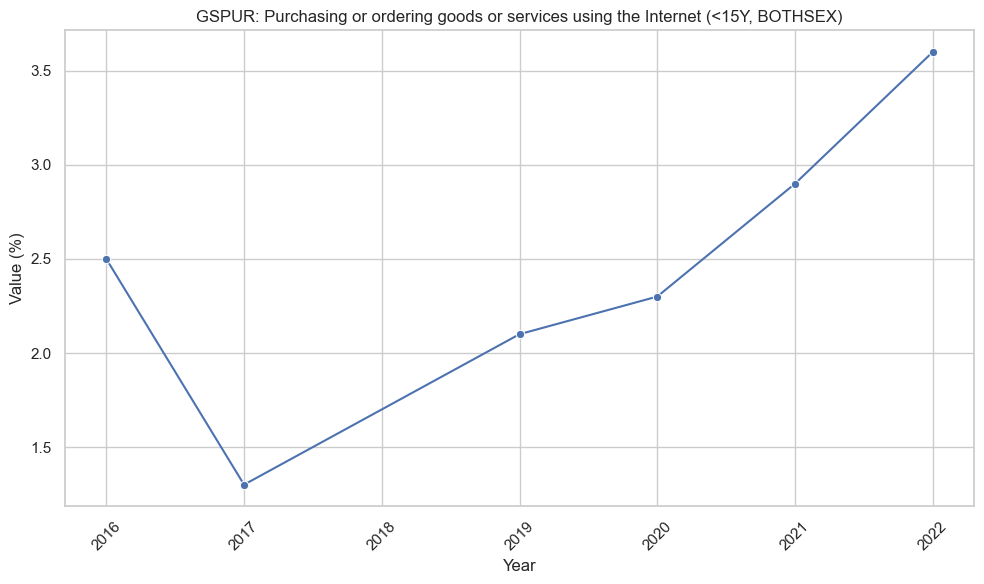

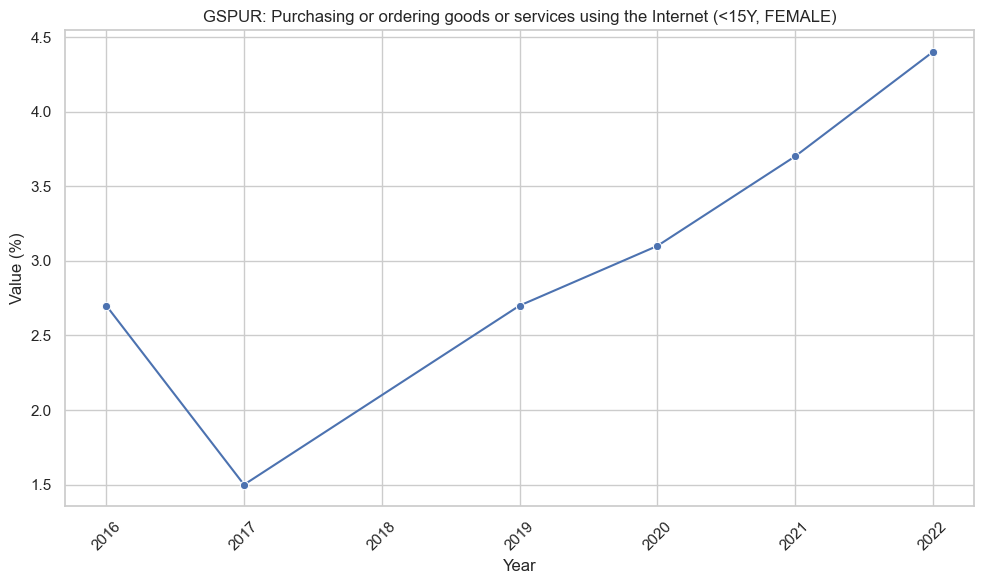

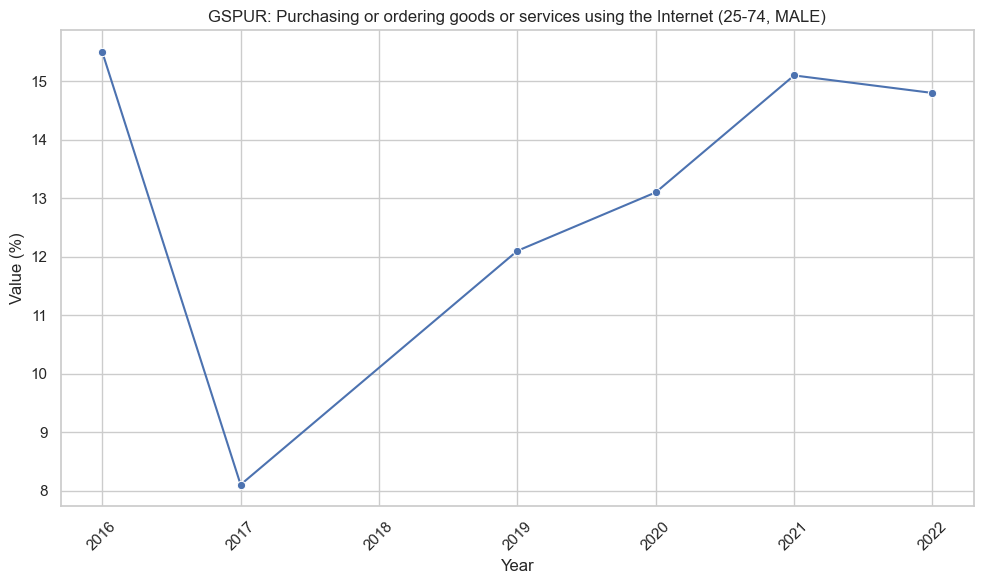

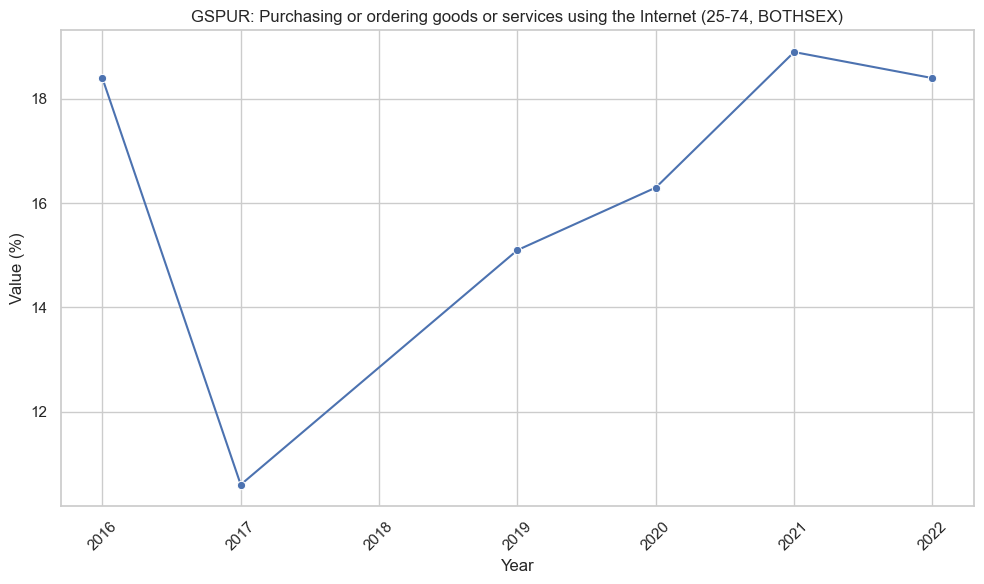

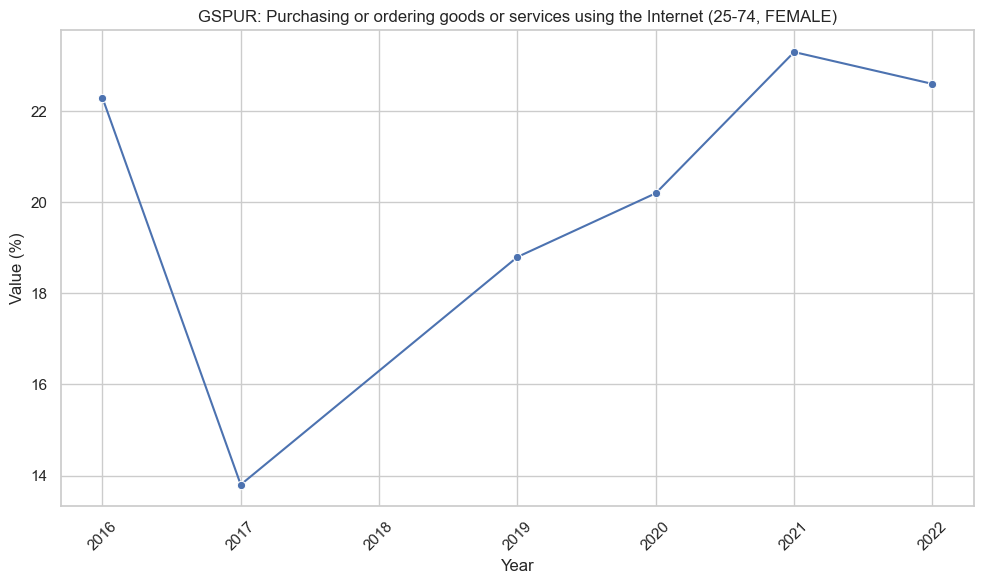

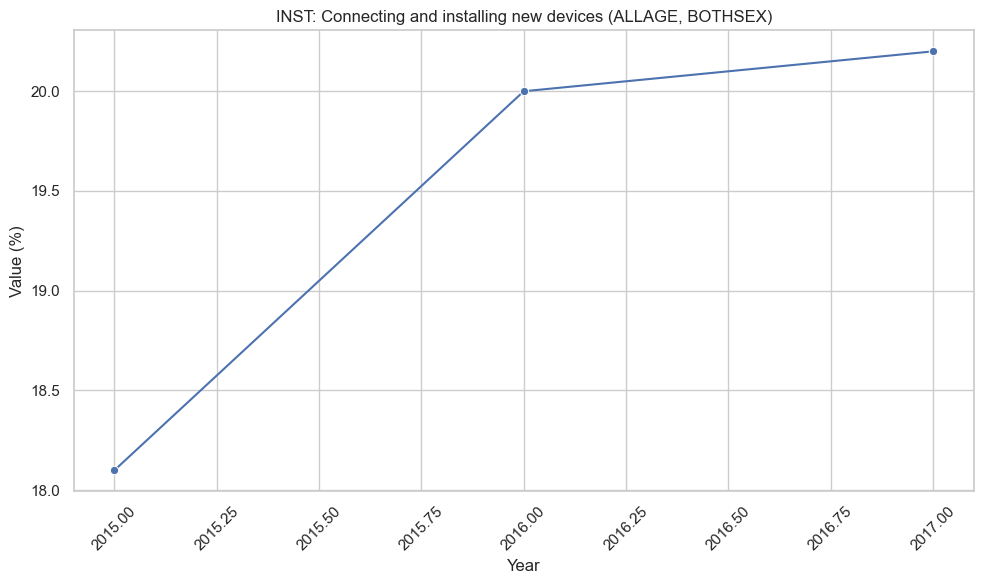

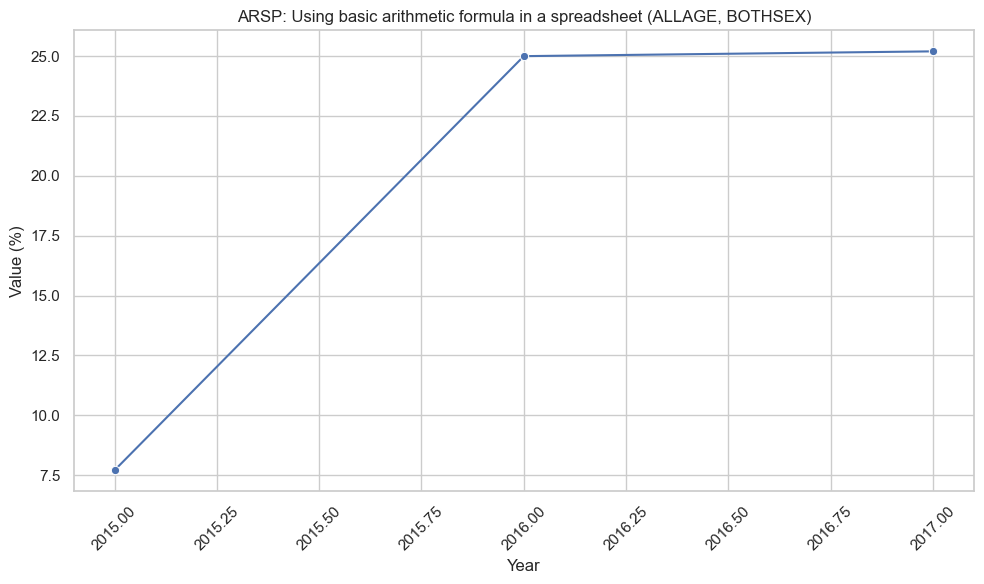

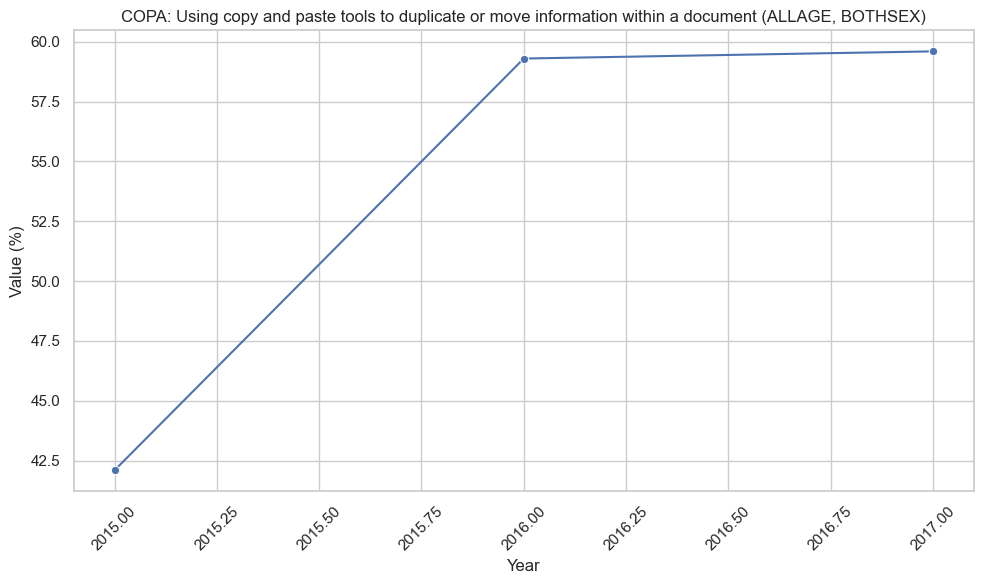

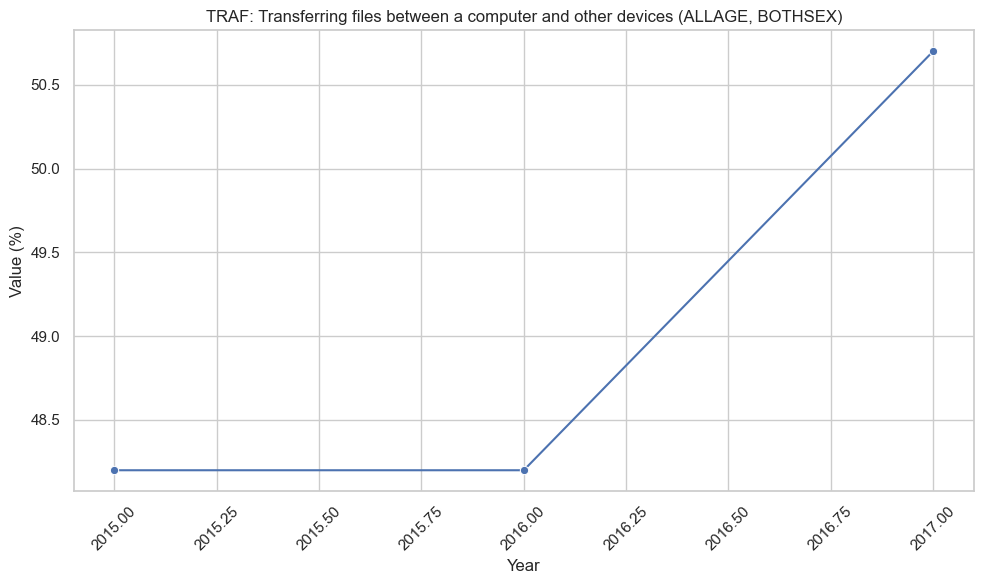

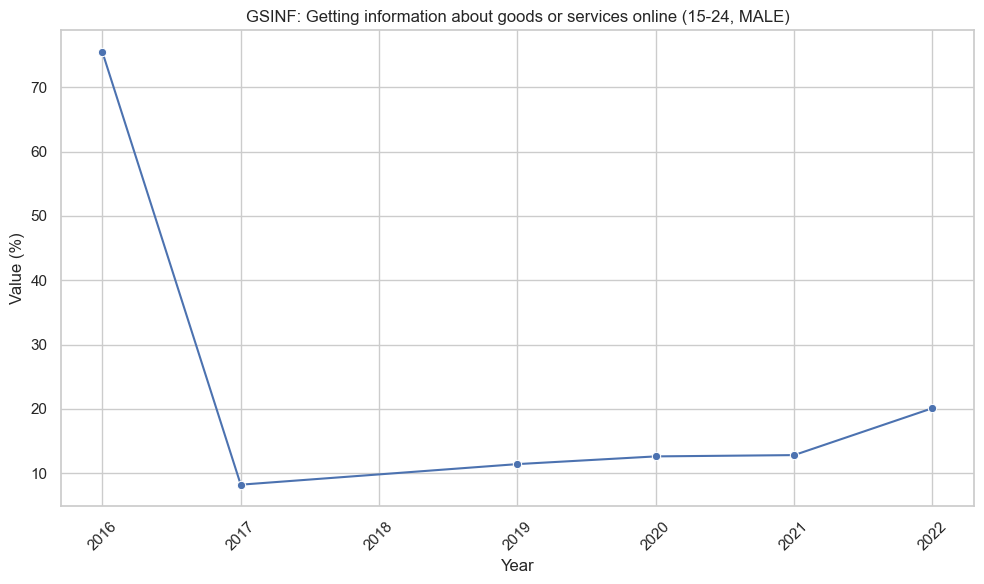

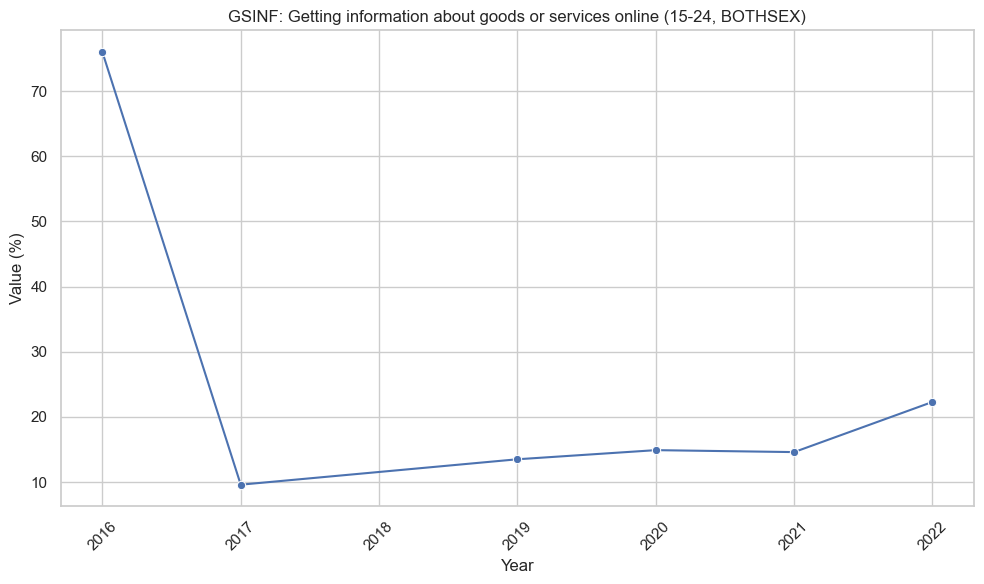

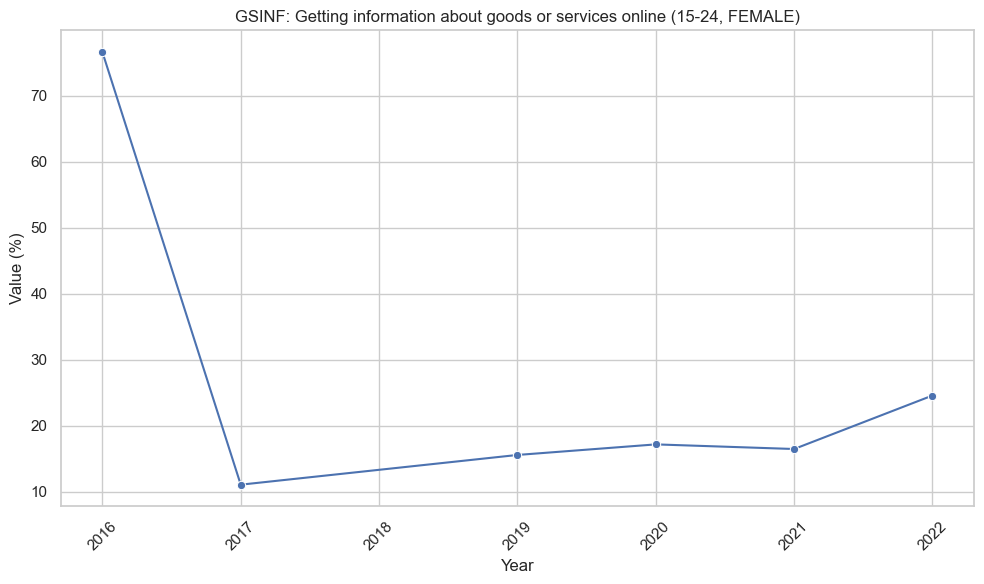

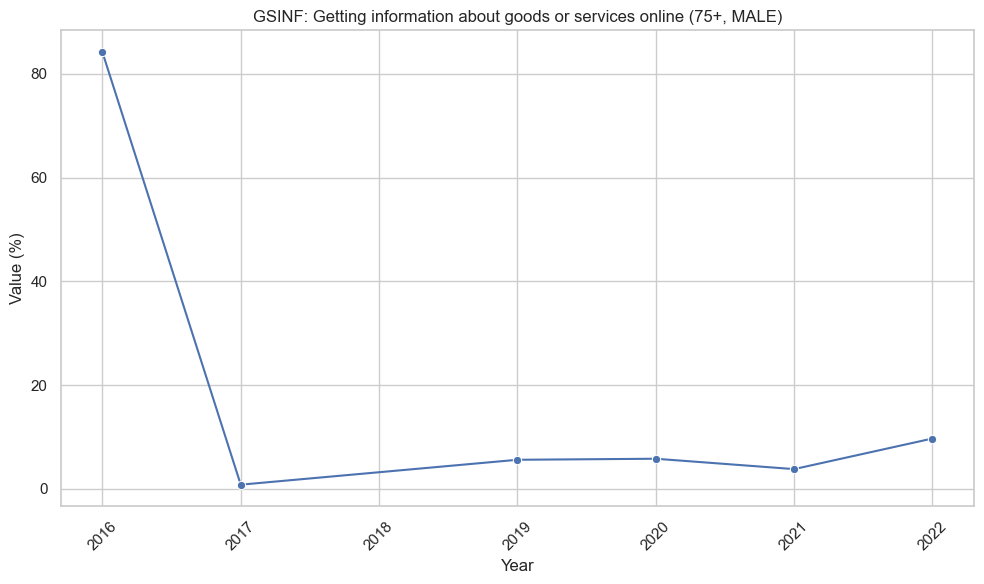

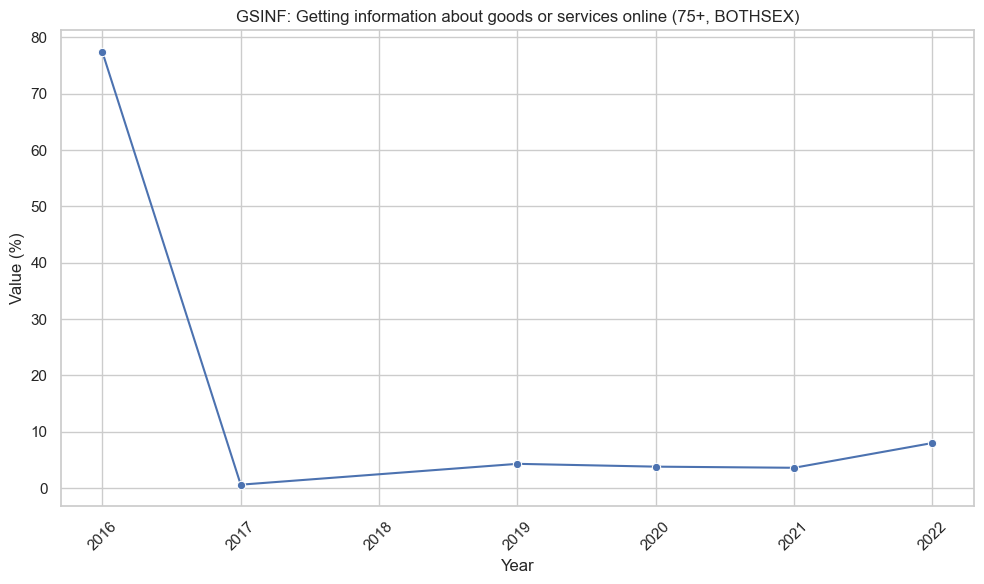

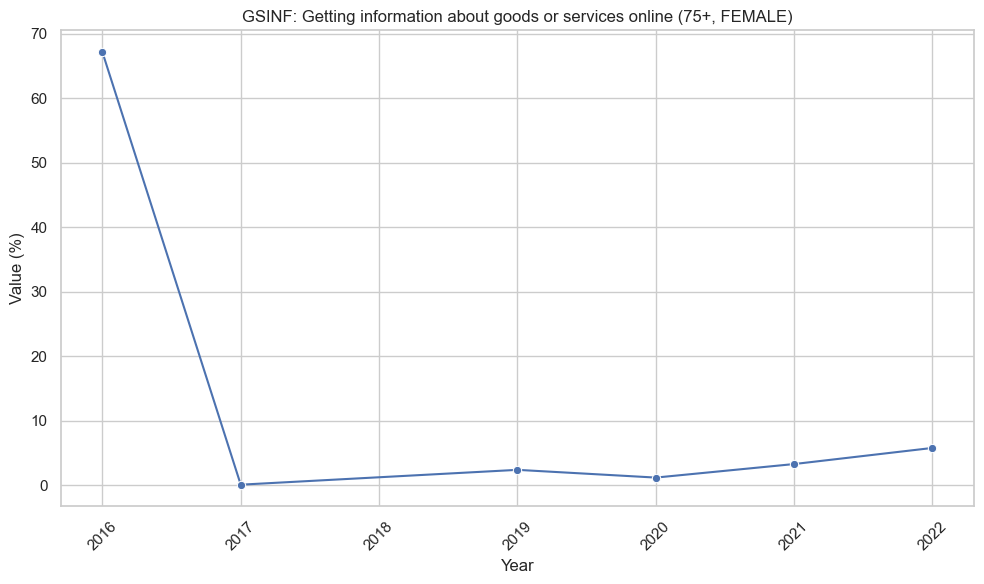

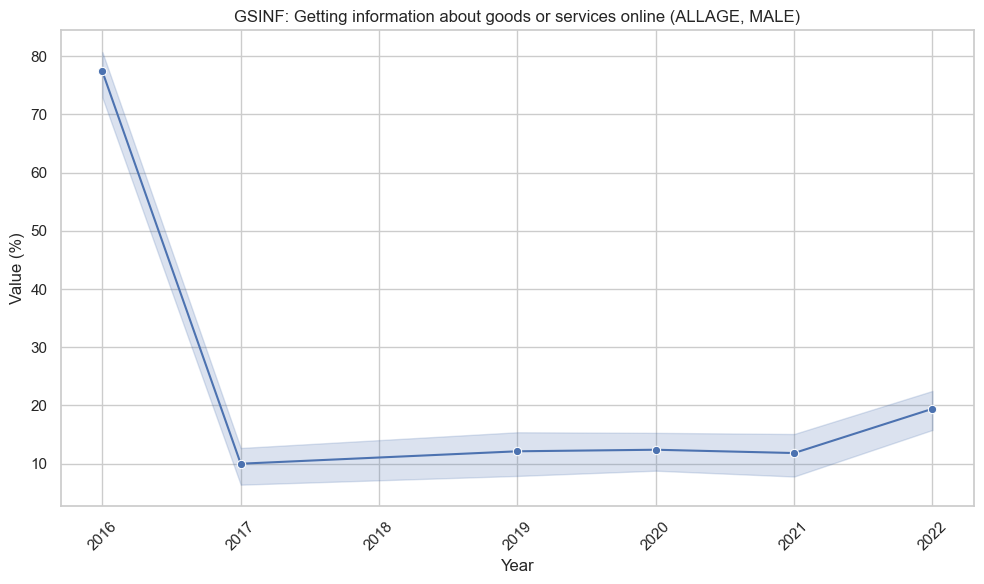

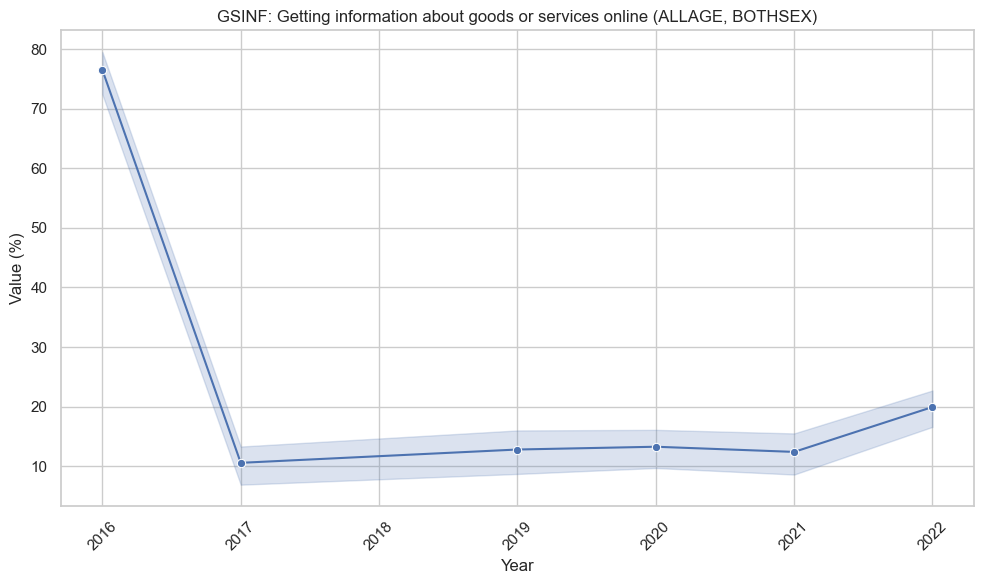

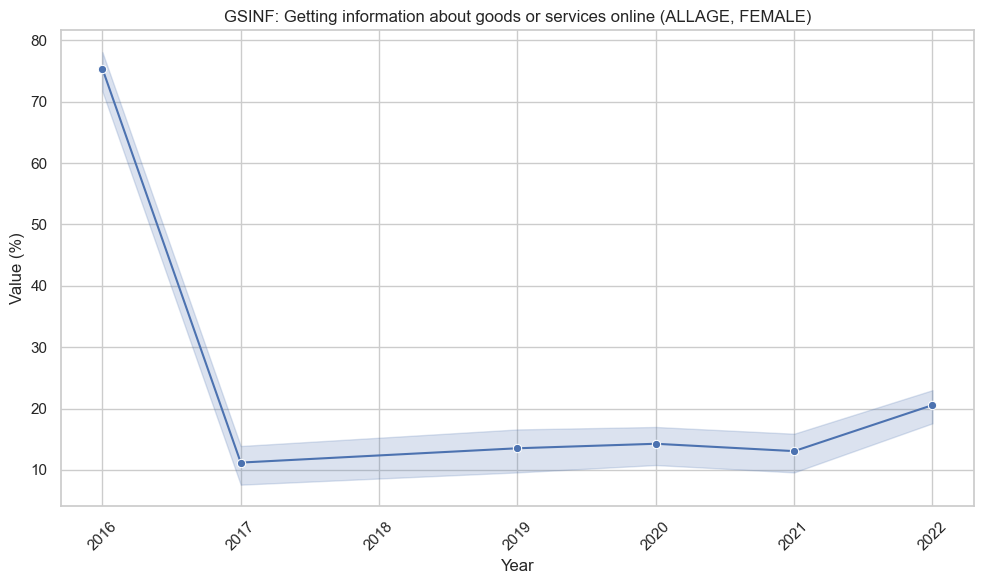

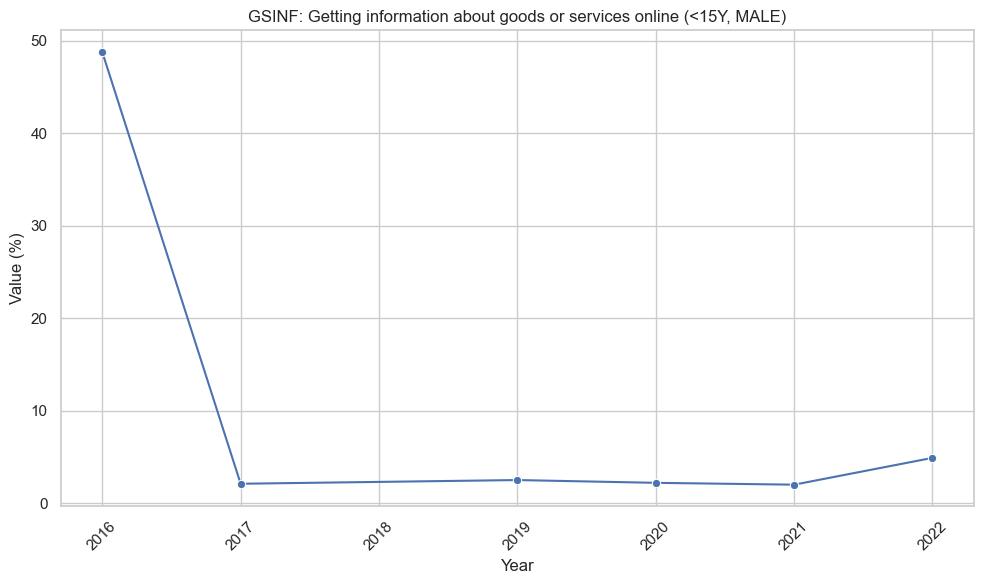

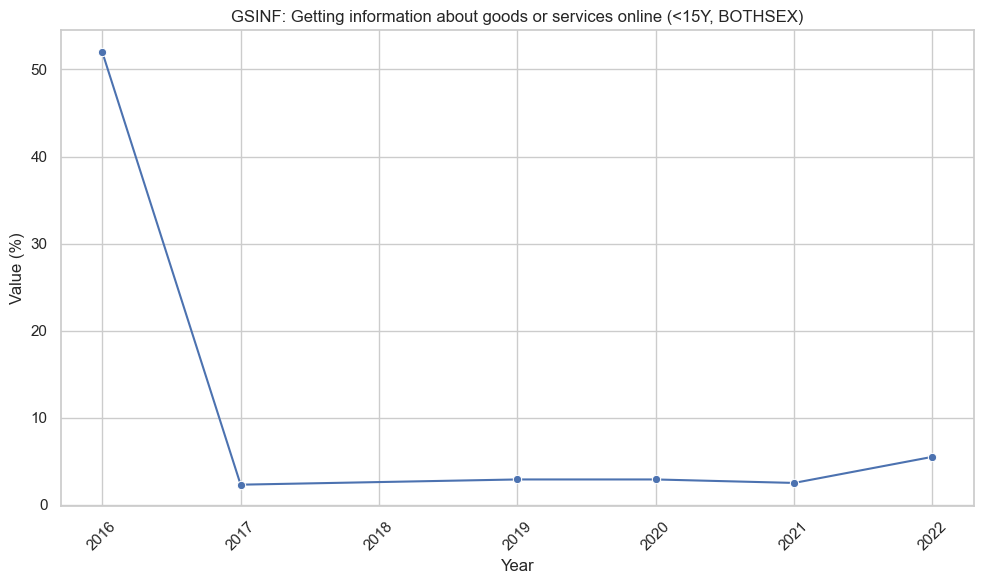

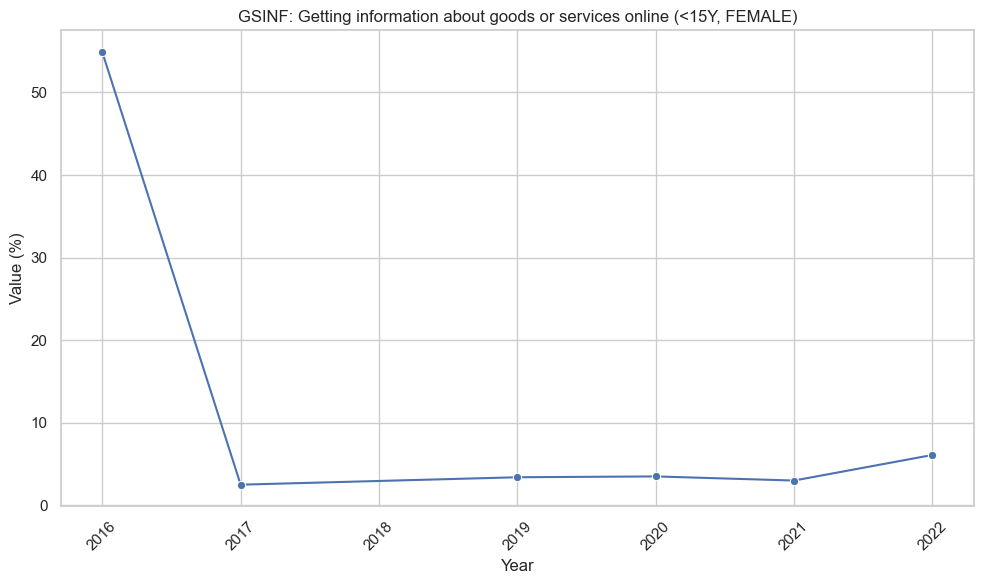

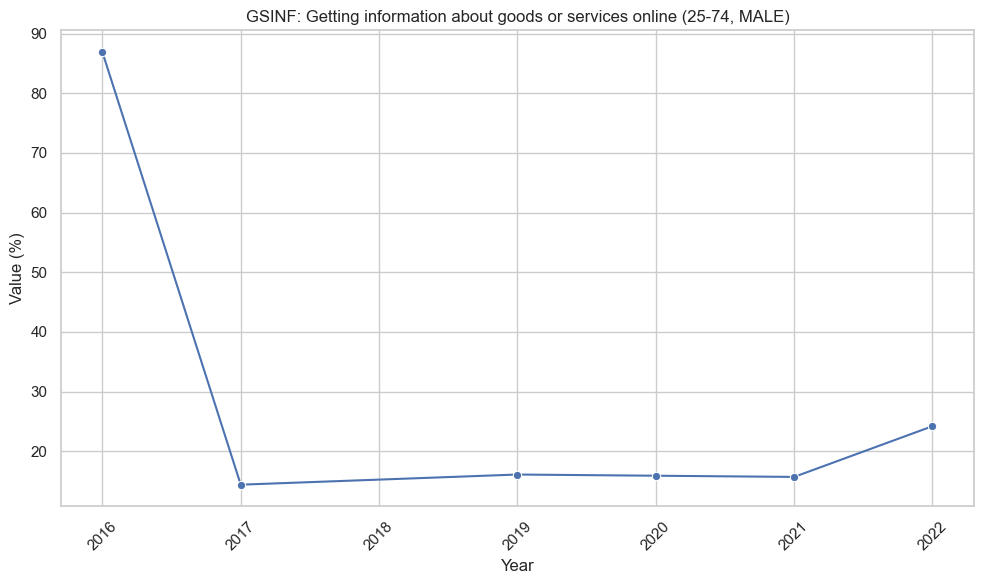

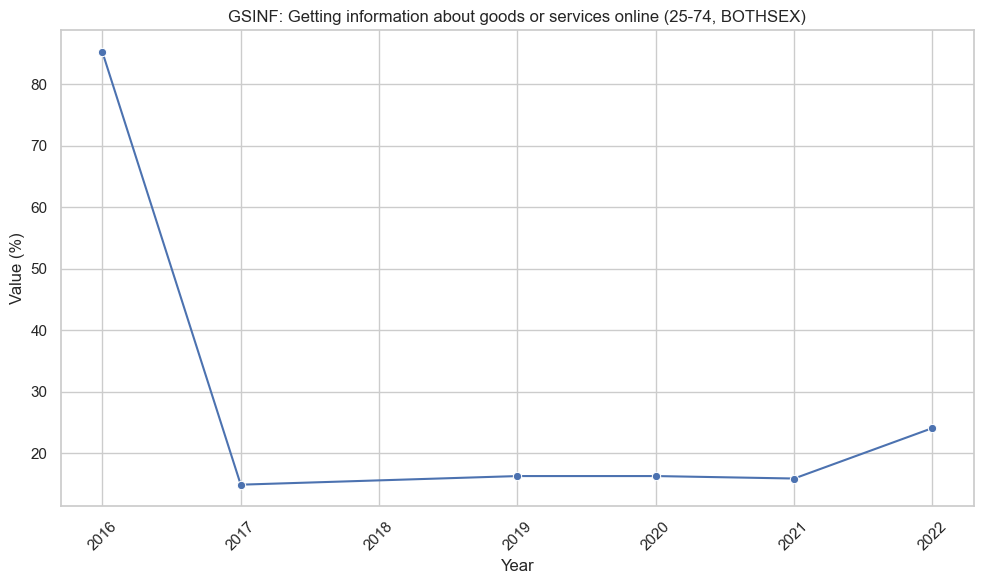

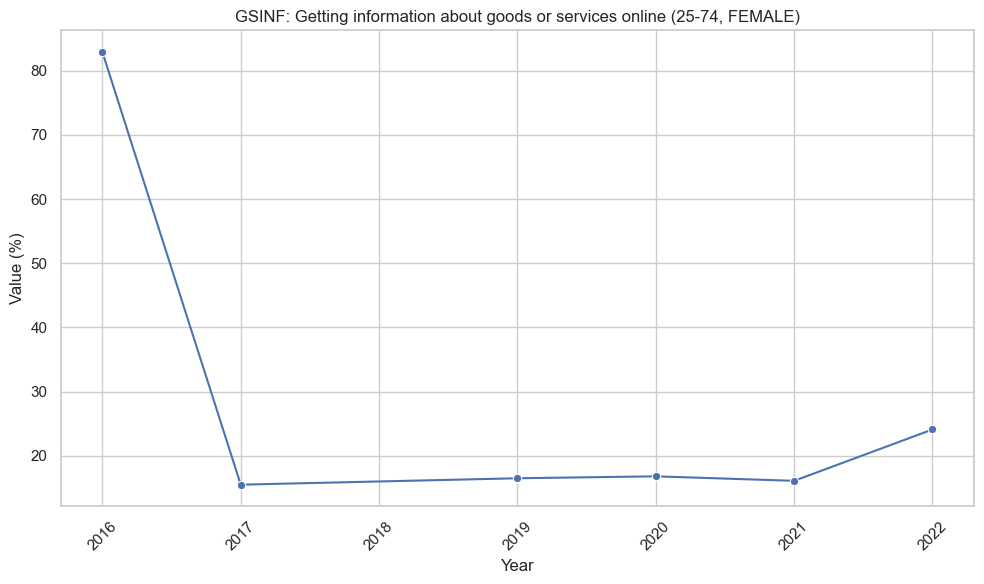

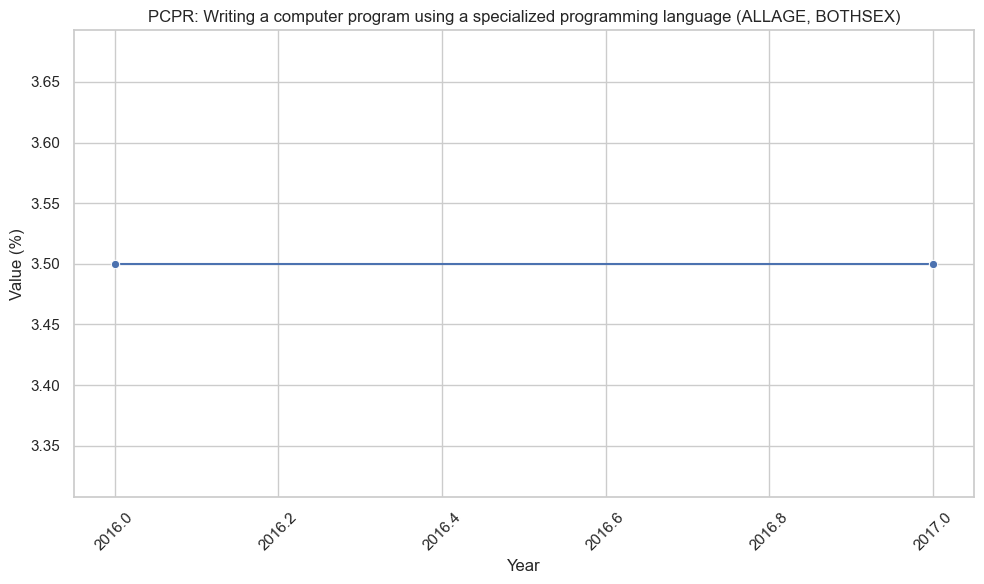

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dictionary to map skill abbreviations to descriptions
skill_descriptions = {
    'ARSP': 'ARSP: Using basic arithmetic formula in a spreadsheet',
    'COPA': 'COPA: Using copy and paste tools to duplicate or move information within a document',
    'DLDONLD': 'DLDONLD: Reading or downloading online newspapers, magazines, or electronic books',
    'EMAIL': 'EMAIL: Sending e-mails with attached files',
    'EPRS': 'EPRS: Creating electronic presentations with presentation software',
    'FONLCRS': 'FONLCRS: Doing a formal online course',
    'GSINF': 'GSINF: Getting information about goods or services online',
    'GSPUR': 'GSPUR: Purchasing or ordering goods or services using the Internet',
    'HLTHINF': 'HLTHINF: Seeking health information (on injury, disease, nutrition, etc.)',
    'INST': 'INST: Connecting and installing new devices',
    'INTBNK': 'INTBNK: Using Internet banking',
    'ONLCNS': 'ONLCNS: Taking part in online consultations or voting to define civic or political issues',
    'ONLSFT': 'ONLSFT: Using software run over the Internet for editing documents or presentations',
    'PCPR': 'PCPR: Writing a computer program using a specialized programming language',
    'PRVCY': 'PRVCY: Changing privacy settings on your device or app',
    'SCRTY': 'SCRTY: Setting up effective security measures to protect devices and accounts',
    'SNTWK': 'SNTWK: Participating in social networks',
    'SOFT': 'SOFT: Finding, downloading, installing and configuring software',
    'TRAF': 'TRAF: Transferring files between a computer and other devices',
    'UPLD': 'UPLD: Uploading self/user-created content to a website to be shared',
    'VOIP': 'VOIP: Telephoning over the Internet/VoIP',
    'VRFY': 'VRFY: Verifying the reliability of information found online'
}

# Get unique values of Type of skill, Age, and Sex
unique_skills = df_indonesia['Type of skill'].unique()
unique_ages = df_indonesia['Age'].unique()
unique_sexes = df_indonesia['Sex'].unique()

# Set the style for seaborn
sns.set(style="whitegrid")

# Loop through each unique Type of skill, Age, and Sex combination
for skill in unique_skills:
    for age in unique_ages:
        for sex in unique_sexes:
            # Filter the data for this specific combination
            filtered_data = df_indonesia[
                (df_indonesia['Type of skill'] == skill) &
                (df_indonesia['Age'] == age) &
                (df_indonesia['Sex'] == sex)
            ]
            
            if not filtered_data.empty:
                # Create the plot
                plt.figure(figsize=(10, 6))
                sns.lineplot(
                    data=filtered_data,
                    x='TimePeriod', y='Value', marker='o'
                )

                # Use the skill description for the title
                title_description = skill_descriptions.get(skill, skill)
                plt.title(f'{title_description} ({age}, {sex})')
                plt.xlabel('Year')
                plt.ylabel('Value (%)')

                # Show the plot
                plt.xticks(rotation=45)
                plt.tight_layout()
                plt.show()

## Penjelasan
Valu pada dataset ini (indikator 4.4.1) yaitu menyatakan persentase yang memiliki type of skill terkait

Contoh: Value 14, age 25 - 74, MALE, INTBNK: Using Internet banking, maka sebanyak 14% pria berumur 25 - 74 tahun di Indonesia menggunakan internet banking